<a href="https://colab.research.google.com/github/gayatri-bagusetty/Engineering-Graduate-Salary-Prediction/blob/main/Engineering_Student_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARIES**

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# use the full option name: display.max_columns
pd.set_option("display.max_columns",None)
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant, OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
Path = '/content/drive/MyDrive/Salaray prediction/Engineering_graduate_salary.csv'

In [11]:
nb=pd.read_csv(Path)

In [12]:
nb

ID Gender         DOB  10percentage                       10board  \
0     604399      f  1990-10-22         87.80                          cbse   
1     988334      m  1990-05-15         57.00                          cbse   
2     301647      m  1989-08-21         77.33  maharashtra state board,pune   
3     582313      m  1991-05-04         84.30                          cbse   
4     339001      f  1990-10-30         82.00                          cbse   
...      ...    ...         ...           ...                           ...   
2993  103174      f  1989-04-17         75.00                             0   
2994  352811      f  1991-07-22         84.00                   state board   
2995  287070      m  1988-11-24         91.40                         bsemp   
2996  317336      m  1988-08-25         88.64     karnataka education board   
2997  993701      m  1992-05-27         77.00                   state board   

      12graduation  12percentage                    12board  CollegeID  \
0             2009         84.00                       cbse       6920   
1             2010         64.50                       cbse       6624   
2             2007         85.17  amravati divisional board       9084   
3             2009         86.00                       cbse       8195   
4             2008         75.00                       cbse       4889   
...            ...           ...                        ...        ...   
2993          2005         73.00                          0       1263   
2994          2008         77.00                state board       9481   
2995          2006         65.56                      bsemp        547   
2996          2006         65.16  karnataka education board       1629   
2997          2009         75.50                state board       1111   

      CollegeTier  ... MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0               1  ...             -1             -1           -1         -1   
1               2  ...             -1             -1           -1         -1   
2               2  ...             -1             -1          260         -1   
3               1  ...             -1             -1           -1         -1   
4               2  ...             -1             -1           -1         -1   
...           ...  ...            ...            ...          ...        ...   
2993            2  ...             -1             -1           -1         -1   
2994            2  ...             -1             -1           -1         -1   
2995            2  ...             -1             -1           -1         -1   
2996            2  ...             -1             -1           -1         -1   
2997            2  ...             -1             -1           -1         -1   

      conscientiousness agreeableness  extraversion  nueroticism  \
0               -0.1590        0.3789        1.2396      0.14590   
1                1.1336        0.0459        1.2396      0.52620   
2                0.5100       -0.1232        1.5428     -0.29020   
3               -0.4463        0.2124        0.3174      0.27270   
4               -1.4992       -0.7473       -1.0697      0.06223   
...                 ...           ...           ...          ...   
2993            -1.1901        0.9688       -1.0697      1.35490   
2994            -0.1082        0.0328       -0.4891     -0.29020   
2995            -0.8810        0.1888       -0.3440      0.06230   
2996             1.4374        1.2808       -0.4891     -1.46537   
2997            -0.5899       -1.9521        0.3174      1.16010   

      openess_to_experience  Salary  
0                    0.2889  445000  
1                   -0.2859  110000  
2                   -0.2875  255000  
3                    0.4805  420000  
4                    0.1864  200000  
...                     ...     ...  
2993                 0.0284  120000  
2994                 0.5024  120000  
2995                 0.6603  385000  
2996          

In [13]:
nb.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')

In [14]:
nb1=nb[['ID', 'Gender', 'DOB', '10percentage','12percentage', 'Degree','Specialization', 'collegeGPA', 'openess_to_experience', 'Salary']]

# **Check the vital statistics of the dataset using the type and shape attributes.**

In [15]:
nb.shape

(2998, 34)

In [16]:
nb.size

101932

In [17]:
nb.isnull().sum()

ID                       0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [18]:
nb.info

<bound method DataFrame.info of           ID Gender         DOB  10percentage                       10board  \
0     604399      f  1990-10-22         87.80                          cbse   
1     988334      m  1990-05-15         57.00                          cbse   
2     301647      m  1989-08-21         77.33  maharashtra state board,pune   
3     582313      m  1991-05-04         84.30                          cbse   
4     339001      f  1990-10-30         82.00                          cbse   
...      ...    ...         ...           ...                           ...   
2993  103174      f  1989-04-17         75.00                             0   
2994  352811      f  1991-07-22         84.00                   state board   
2995  287070      m  1988-11-24         91.40                         bsemp   
2996  317336      m  1988-08-25         88.64     karnataka education board   
2997  993701      m  1992-05-27         77.00                   state board   

      12graduation  12percentage                    12board  CollegeID  \
0             2009         84.00                       cbse       6920   
1             2010         64.50                       cbse       6624   
2             2007         85.17  amravati divisional board       9084   
3             2009         86.00                       cbse       8195   
4             2008         75.00                       cbse       4889   
...            ...           ...                        ...        ...   
2993          2005         73.00                          0       1263   
2994          2008         77.00                state board       9481   
2995          2006         65.56                      bsemp        547   
2996          2006         65.16  karnataka education board       1629   
2997          2009         75.50                state board       1111   

      CollegeTier  ... MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0               1  ...             -1             -1           -1         -1   
1               2  ...             -1             -1           -1         -1   
2               2  ...             -1             -1          260         -1   
3               1  ...             -1             -1           -1         -1   
4               2  ...             -1             -1           -1         -1   
...           ...  ...            ...            ...          ...        ...   
2993            2  ...             -1             -1           -1         -1   
2994            2  ...             -1             -1           -1         -1   
2995            2  ...             -1             -1           -1         -1   
2996            2  ...             -1             -1           -1         -1   
2997            2  ...             -1             -1           -1         -1   

      conscientiousness agreeableness  extraversion  nueroticism  \
0               -0.1590        0.3789        1.2396      0.14590   
1                1.1336        0.0459        1.2396      0.52620   
2                0.5100       -0.1232        1.5428     -0.29020   
3               -0.4463        0.2124        0.3174      0.27270   
4               -1.4992       -0.7473       -1.0697      0.06223   
...                 ...           ...           ...          ...   
2993            -1.1901        0.9688       -1.0697      1.35490   
2994            -0.1082        0.0328       -0.4891     -0.29020   
2995            -0.8810        0.1888       -0.3440      0.06230   
2996             1.4374        1.2808       -0.4891     -1.46537   
2997            -0.5899       -1.9521        0.3174      1.16010   

      openess_to_experience  Salary  
0                    0.2889  445000  
1                   -0.2859  110000  
2                   -0.2875  255000  
3                    0.4805  420000  
4                    0.1864  200000  
...                     ...     ...  
2993                 0.0284  120000  
2994                 0.5024  120000  
2995      

In [19]:
nb.describe

<bound method NDFrame.describe of           ID Gender         DOB  10percentage                       10board  \
0     604399      f  1990-10-22         87.80                          cbse   
1     988334      m  1990-05-15         57.00                          cbse   
2     301647      m  1989-08-21         77.33  maharashtra state board,pune   
3     582313      m  1991-05-04         84.30                          cbse   
4     339001      f  1990-10-30         82.00                          cbse   
...      ...    ...         ...           ...                           ...   
2993  103174      f  1989-04-17         75.00                             0   
2994  352811      f  1991-07-22         84.00                   state board   
2995  287070      m  1988-11-24         91.40                         bsemp   
2996  317336      m  1988-08-25         88.64     karnataka education board   
2997  993701      m  1992-05-27         77.00                   state board   

      12graduation  12percentage                    12board  CollegeID  \
0             2009         84.00                       cbse       6920   
1             2010         64.50                       cbse       6624   
2             2007         85.17  amravati divisional board       9084   
3             2009         86.00                       cbse       8195   
4             2008         75.00                       cbse       4889   
...            ...           ...                        ...        ...   
2993          2005         73.00                          0       1263   
2994          2008         77.00                state board       9481   
2995          2006         65.56                      bsemp        547   
2996          2006         65.16  karnataka education board       1629   
2997          2009         75.50                state board       1111   

      CollegeTier  ... MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0               1  ...             -1             -1           -1         -1   
1               2  ...             -1             -1           -1         -1   
2               2  ...             -1             -1          260         -1   
3               1  ...             -1             -1           -1         -1   
4               2  ...             -1             -1           -1         -1   
...           ...  ...            ...            ...          ...        ...   
2993            2  ...             -1             -1           -1         -1   
2994            2  ...             -1             -1           -1         -1   
2995            2  ...             -1             -1           -1         -1   
2996            2  ...             -1             -1           -1         -1   
2997            2  ...             -1             -1           -1         -1   

      conscientiousness agreeableness  extraversion  nueroticism  \
0               -0.1590        0.3789        1.2396      0.14590   
1                1.1336        0.0459        1.2396      0.52620   
2                0.5100       -0.1232        1.5428     -0.29020   
3               -0.4463        0.2124        0.3174      0.27270   
4               -1.4992       -0.7473       -1.0697      0.06223   
...                 ...           ...           ...          ...   
2993            -1.1901        0.9688       -1.0697      1.35490   
2994            -0.1082        0.0328       -0.4891     -0.29020   
2995            -0.8810        0.1888       -0.3440      0.06230   
2996             1.4374        1.2808       -0.4891     -1.46537   
2997            -0.5899       -1.9521        0.3174      1.16010   

      openess_to_experience  Salary  
0                    0.2889  445000  
1                   -0.2859  110000  
2                   -0.2875  255000  
3                    0.4805  420000  
4                    0.1864  200000  
...                     ...     ...  
2993                 0.0284  120000  
2994                 0.5024  120000  
2995    

In [20]:
nb.isnull().values.sum()

0

In [21]:
nb.isnull().any().any()

False

# **Checking for Outliers**

In [22]:
print(nb.describe().T)

                        count           mean            std         min  \
ID                     2998.0  664892.583389  364895.076716  11244.0000   
10percentage           2998.0      77.666264      10.002785     43.0000   
12graduation           2998.0    2008.080720       1.631814   1998.0000   
12percentage           2998.0      74.341061      11.120299     40.0000   
CollegeID              2998.0    5210.210807    4776.609877      2.0000   
CollegeTier            2998.0       1.924616       0.264053      1.0000   
collegeGPA             2998.0      71.509857       8.122462      6.6300   
CollegeCityID          2998.0    5210.210807    4776.609877      2.0000   
CollegeCityTier        2998.0       0.296197       0.456655      0.0000   
GraduationYear         2998.0    2011.939960      36.780582      0.0000   
English                2998.0     501.066378     105.304512    180.0000   
Logical                2998.0     500.431621      87.299850    195.0000   
Quant                  29

In [23]:
a=[]
for i in nb:
    b=nb[i].nunique()
    a.append(b)

In [24]:
unique=pd.DataFrame(index=nb.columns,data=a,columns=["Total no of unique values"])
dtype=pd.DataFrame(data=nb.dtypes, columns=["Data type"])
mg=pd.merge(unique, dtype, on=nb.columns, how='outer')
mg.rename(columns={"key_0":"Column_Names"},inplace=True)
mg.set_index("Column_Names")

Total no of unique values Data type
Column_Names                                              
10board                                      221    object
10percentage                                 736   float64
12board                                      277    object
12graduation                                  13     int64
12percentage                                 717   float64
CivilEngg                                     15     int64
CollegeCityID                               1173     int64
CollegeCityTier                                2     int64
CollegeID                                   1173     int64
CollegeState                                  26    object
CollegeTier                                    2     int64
ComputerProgramming                           76     int64
ComputerScience                               19     int64
DOB                                         1633    object
Degree                                         4    object
Domain                                       221   float64
ElectricalEngg                                29     int64
ElectronicsAndSemicon                         29     int64
English                                      109     int64
Gender                                         2    object
GraduationYear                                11     int64
ID                                          2998     int64
Logical                                      104     int64
MechanicalEngg                                39     int64
Quant                                        133     int64
Salary                                       165     int64
Specialization                                42    object
TelecomEngg                                   24     int64
agreeableness                                136   float64
collegeGPA                                  1064   float64
conscientiousness                            129   float64
extraversion                                 142   float64
nueroticism                                  204   float64
openess_to_experience                        131   float64

# **Missing Data**

In [25]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [26]:
draw_missing_data_table(nb)

Total  Percent
ID                         0      0.0
ElectricalEngg             0      0.0
Quant                      0      0.0
Domain                     0      0.0
ComputerProgramming        0      0.0
ElectronicsAndSemicon      0      0.0
ComputerScience            0      0.0
MechanicalEngg             0      0.0
TelecomEngg                0      0.0
Gender                     0      0.0
CivilEngg                  0      0.0
conscientiousness          0      0.0
agreeableness              0      0.0
extraversion               0      0.0
nueroticism                0      0.0
openess_to_experience      0      0.0
Logical                    0      0.0
English                    0      0.0
GraduationYear             0      0.0
CollegeState               0      0.0
CollegeCityTier            0      0.0
CollegeCityID              0      0.0
collegeGPA                 0      0.0
Specialization             0      0.0
Degree                     0      0.0
CollegeTier                0      0.0
CollegeID                  0      0.0
12board                    0      0.0
12percentage               0      0.0
12graduation               0      0.0
10board                    0      0.0
10percentage               0      0.0
DOB                        0      0.0
Salary                     0      0.0

In [27]:
nb.drop(['ID', '10board','12graduation','12board' ,'CollegeID' , 'CollegeCityID','CollegeState', 'CollegeCityTier',"DOB","GraduationYear","CollegeTier"], axis = 1, inplace = True)

In [28]:
nb

Gender  10percentage  12percentage       Degree  \
0         f         87.80         84.00  B.Tech/B.E.   
1         m         57.00         64.50  B.Tech/B.E.   
2         m         77.33         85.17  B.Tech/B.E.   
3         m         84.30         86.00  B.Tech/B.E.   
4         f         82.00         75.00  B.Tech/B.E.   
...     ...           ...           ...          ...   
2993      f         75.00         73.00  B.Tech/B.E.   
2994      f         84.00         77.00  B.Tech/B.E.   
2995      m         91.40         65.56  B.Tech/B.E.   
2996      m         88.64         65.16  B.Tech/B.E.   
2997      m         77.00         75.50  B.Tech/B.E.   

                                 Specialization  collegeGPA  English  Logical  \
0       instrumentation and control engineering       73.82      650      665   
1                computer science & engineering       65.00      440      435   
2              electronics & telecommunications       61.94      485      475   
3                computer science & engineering       80.40      675      620   
4                                 biotechnology       64.30      575      495   
...                                         ...         ...      ...      ...   
2993  electronics and communication engineering       70.00      505      485   
2994                     information technology       75.20      345      585   
2995                     information technology       73.19      385      425   
2996                       computer engineering       74.81      465      645   
2997                     information technology       69.30      370      390   

      Quant    Domain  ...  MechanicalEngg  ElectricalEngg  TelecomEngg  \
0       810  0.694479  ...              -1              -1           -1   
1       210  0.342315  ...              -1              -1           -1   
2       505  0.824666  ...              -1              -1          260   
3       635  0.990009  ...              -1              -1           -1   
4       365  0.278457  ...              -1              -1           -1   
...     ...       ...  ...             ...             ...          ...   
2993    445  0.538387  ...              -1              -1           -1   
2994    395  0.190153  ...              -1              -1           -1   
2995    485  0.600057  ...              -1              -1           -1   
2996    505  0.901490  ...              -1              -1           -1   
2997    285  0.486747  ...              -1              -1           -1   

      CivilEngg  conscientiousness  agreeableness  extraversion  nueroticism  \
0            -1            -0.1590         0.3789        1.2396      0.14590   
1            -1             1.1336         0.0459        1.2396      0.52620   
2            -1             0.5100        -0.1232        1.5428     -0.29020   
3            -1            -0.4463         0.2124        0.3174      0.27270   
4            -1            -1.4992        -0.7473       -1.0697      0.06223   
...         ...                ...            ...           ...          ...   
2993         -1            -1.1901         0.9688       -1.0697      1.35490   
2994         -1            -0.1082         0.0328       -0.4891     -0.29020   
2995         -1            -0.8810         0.1888       -0.3440      0.06230   
2996         -1             1.4374         1.2808       -0.4891     -1.46537   
2997         -1            -0.5899        -1.9521        0.3174      1.16010   

      openess_to_experience  Salary  
0                    0.2889  445000  
1                   -0.2859  110000  
2                   -0.2875  255000  
3                    0.4805  420000  
4                    0.1864  200000  
...                     ...     ...  
2993                 0.0284  120000  
2994                 0.5024  120000  
2995                 0.6603  385000  
2996                 0.5419  530000  
2997                -2.3937  200000  

[2998 rows x 23 columns]

In [29]:
nb.isnull().sum()

Gender                   0
10percentage             0
12percentage             0
Degree                   0
Specialization           0
collegeGPA               0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Salary                   0
dtype: int64

In [30]:
personality = pd.DataFrame(nb[['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Salary']]) #5types of personalies datasets

In [31]:
gradeExamMarks = nb[['10percentage', '12percentage']].copy()

# **Scatter Plot**

<Axes: xlabel='10percentage', ylabel='12percentage'>

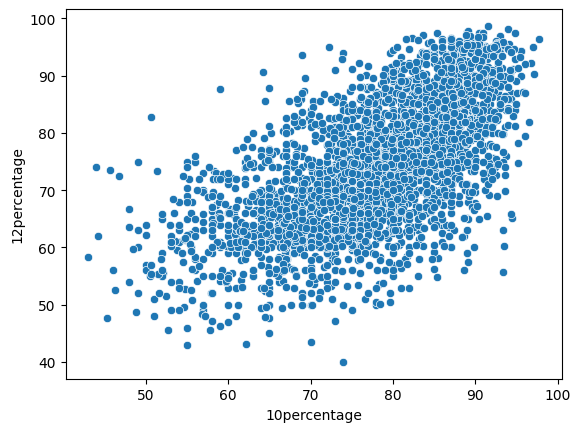

In [36]:
sns.scatterplot(x=gradeExamMarks['10percentage'], y=gradeExamMarks['12percentage'])

# **Pair Plot**

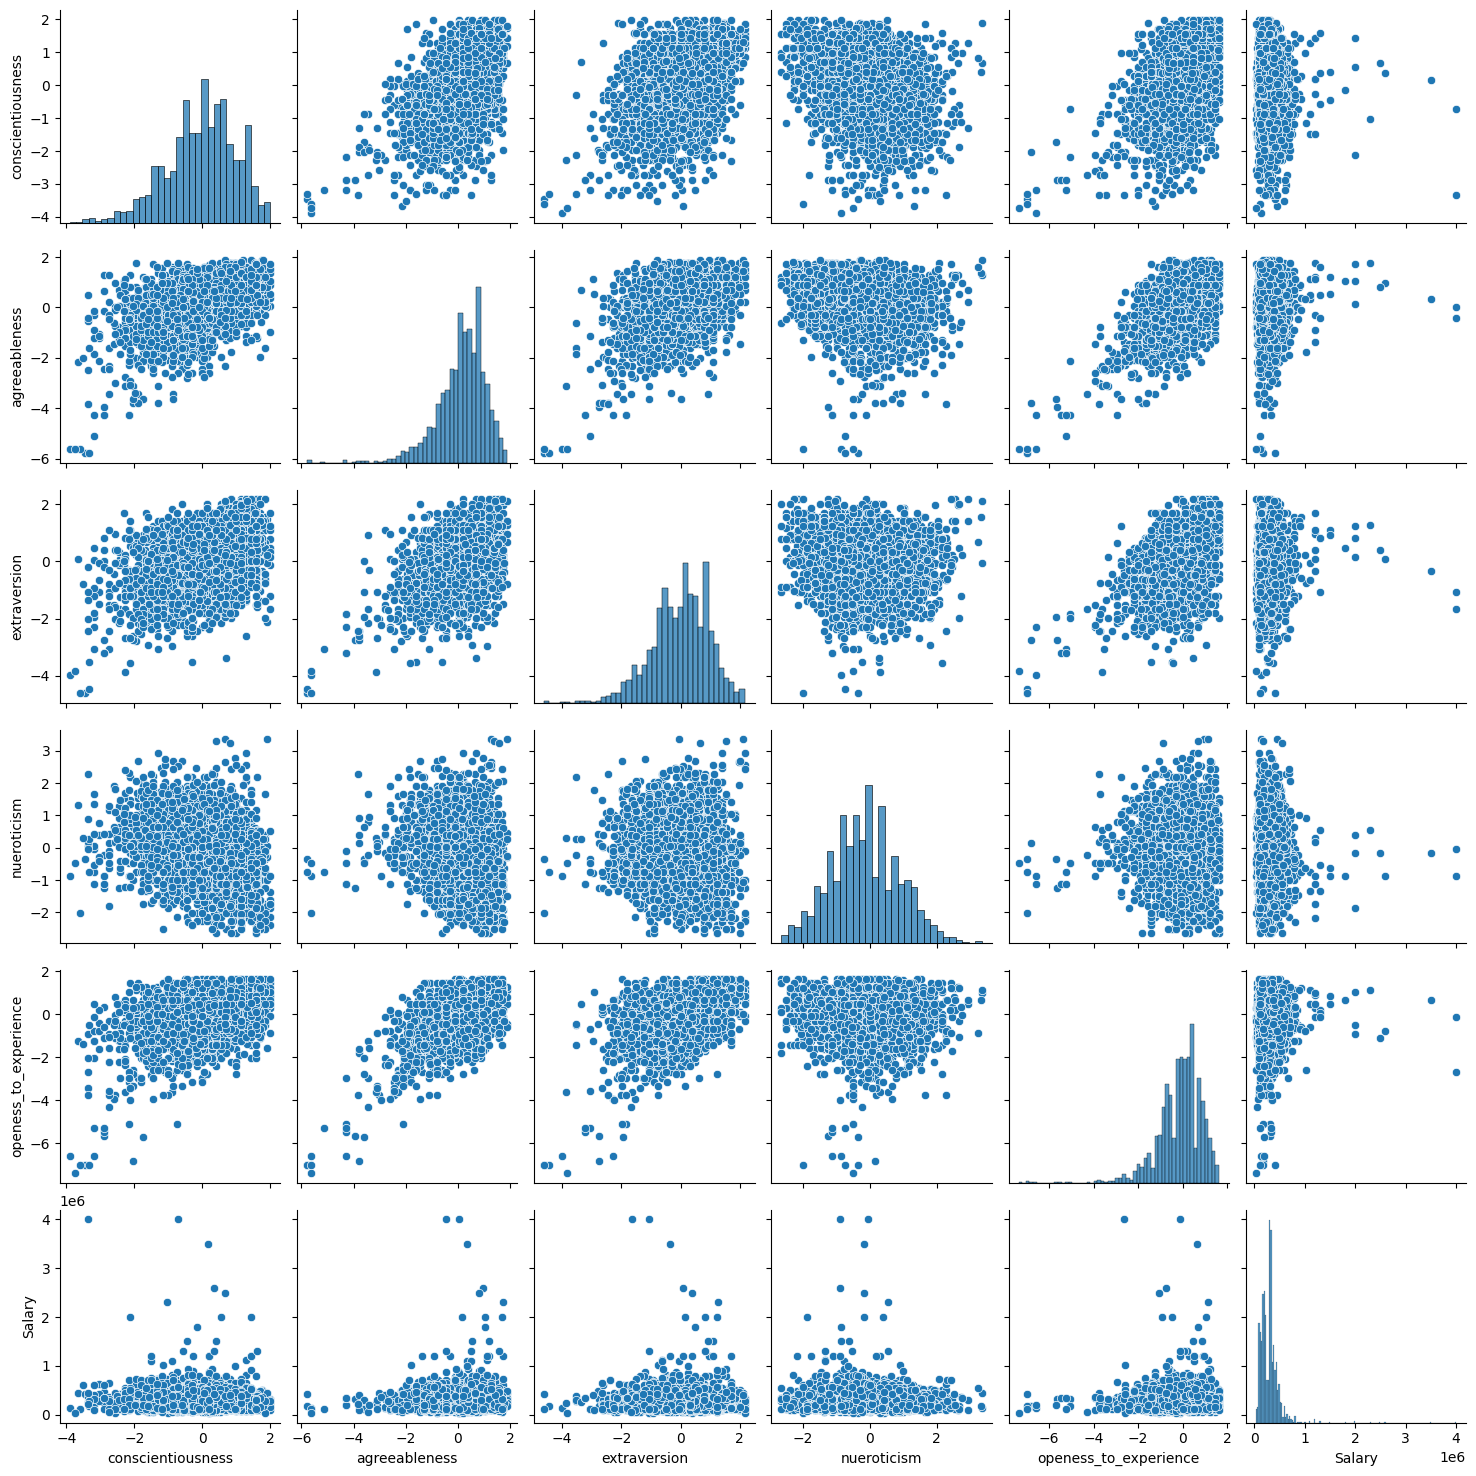

In [37]:
sns.pairplot(data = personality)

Text(0.5, 1.0, 'ComputerScience')

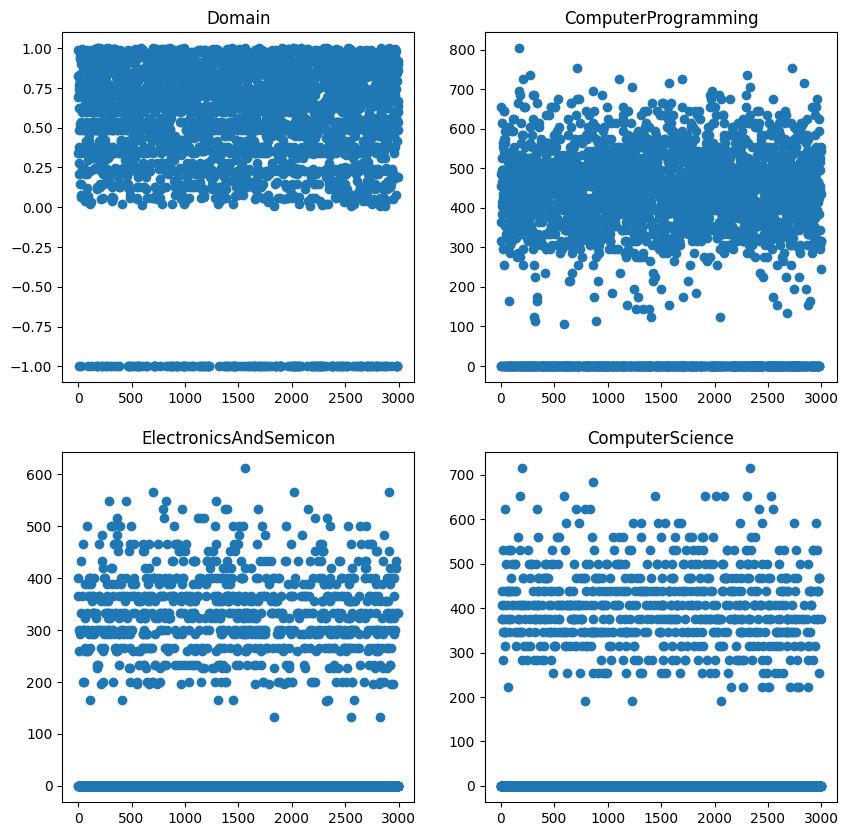

In [38]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(nb.index, nb['Domain'])
plt.title('Domain')

plt.subplot(2,2,2)
plt.scatter(nb.index, nb['ComputerProgramming'])
plt.title('ComputerProgramming')

plt.subplot(2,2,3)
plt.scatter(nb.index, nb['ElectronicsAndSemicon'])
plt.title('ElectronicsAndSemicon')

plt.subplot(2,2,4)
plt.scatter(nb.index, nb['ComputerScience'])
plt.title('ComputerScience')

Text(0.5, 1.0, 'Quant')

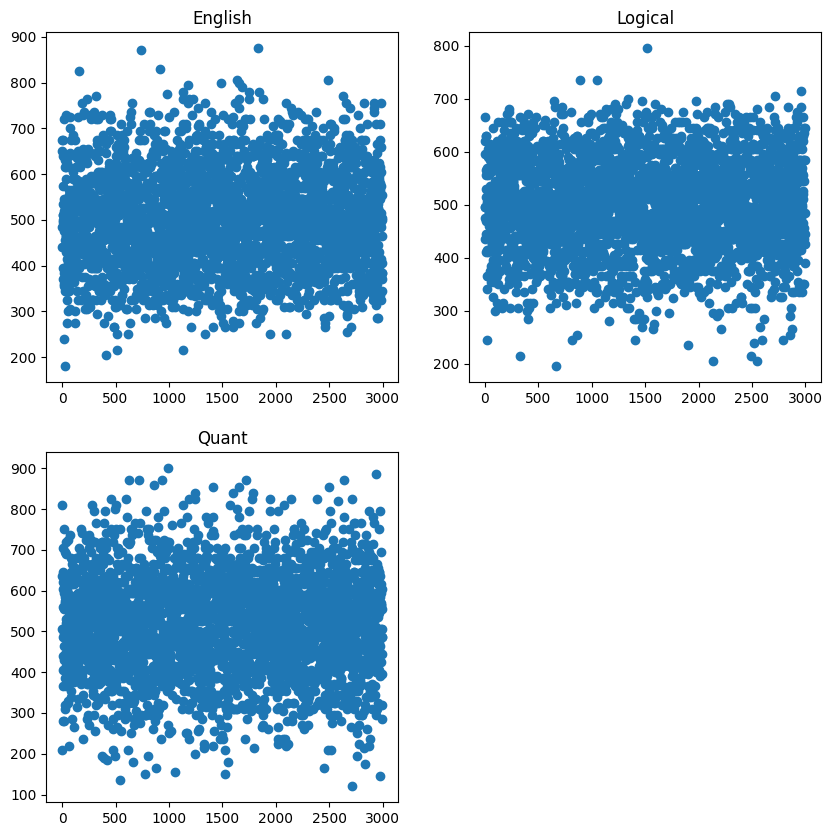

In [39]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(nb.index, nb['English'])
plt.title('English')


plt.subplot(2,2,2)
plt.scatter(nb.index, nb['Logical'])
plt.title('Logical')

plt.subplot(2,2,3)
plt.scatter(nb.index, nb['Quant'])
plt.title('Quant')

Text(0.5, 1.0, 'CivilEngg')

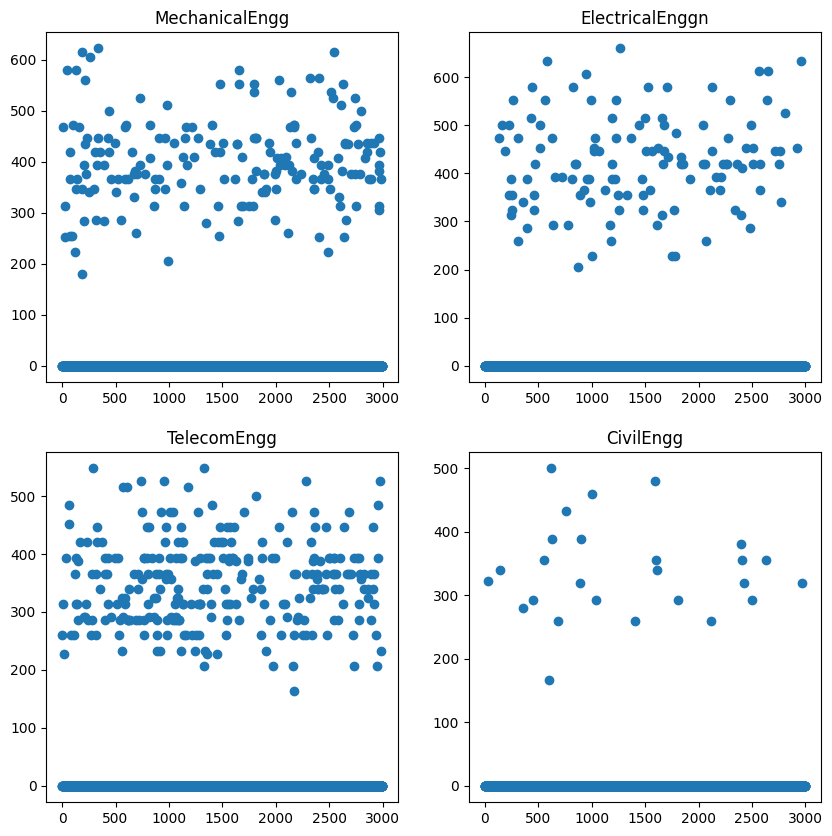

In [40]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(nb.index, nb['MechanicalEngg'])
plt.title('MechanicalEngg')

plt.subplot(2,2,2)
plt.scatter(nb.index, nb['ElectricalEngg'])
plt.title('ElectricalEnggn')

plt.subplot(2,2,3)
plt.scatter(nb.index, nb['TelecomEngg'])
plt.title('TelecomEngg')

plt.subplot(2,2,4)
plt.scatter(nb.index, nb['CivilEngg'])
plt.title('CivilEngg')

# **Correlation Matrix**

In [42]:
numerical_features = nb.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

                       10percentage  12percentage  collegeGPA   English  \
10percentage               1.000000      0.645578    0.311209  0.348452   
12percentage               0.645578      1.000000    0.335041  0.211218   
collegeGPA                 0.311209      0.335041    1.000000  0.100617   
English                    0.348452      0.211218    0.100617  1.000000   
Logical                    0.309558      0.237480    0.192549  0.441358   
Quant                      0.328888      0.316400    0.219545  0.375415   
Domain                     0.079927      0.073431    0.091883  0.097777   
ComputerProgramming        0.052249      0.070979    0.138592  0.128537   
ElectronicsAndSemicon      0.091123      0.130723    0.031423  0.019831   
ComputerScience           -0.013196     -0.046259    0.000075  0.072639   
MechanicalEngg             0.053343      0.041109   -0.040812 -0.005057   
ElectricalEngg             0.065815      0.065761    0.056289  0.022872   
TelecomEngg              

# **Heat Map**

Column 'Gender' could not be converted to numeric. It may contain non-numeric values.
Column 'Degree' could not be converted to numeric. It may contain non-numeric values.
Column 'Specialization' could not be converted to numeric. It may contain non-numeric values.


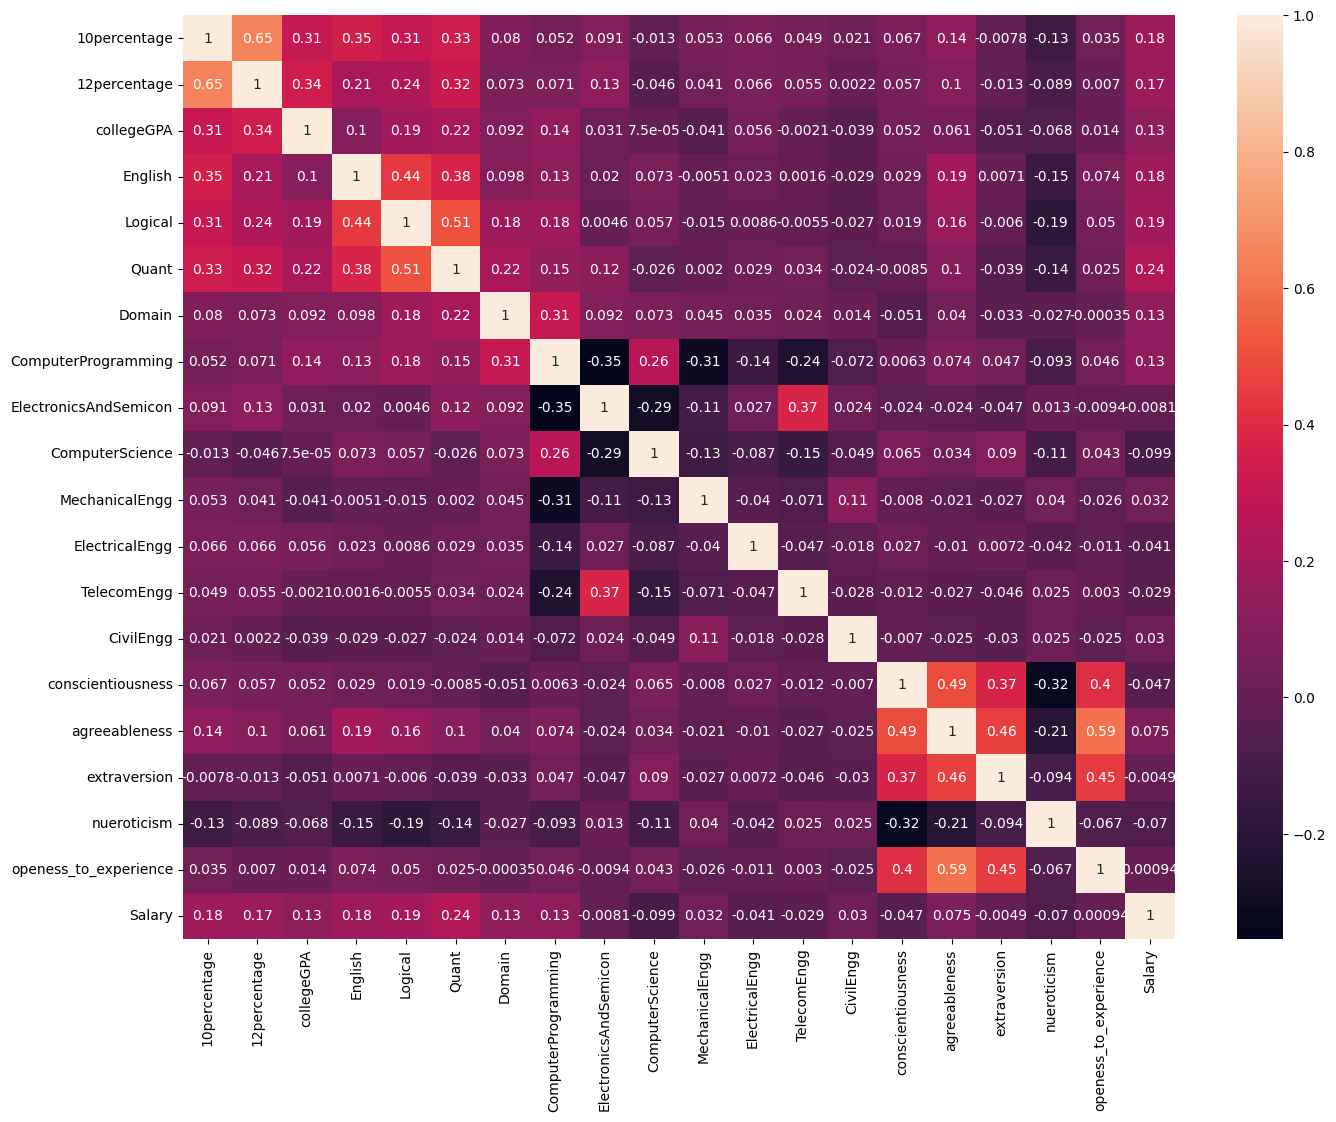

In [44]:
for col in nb.select_dtypes(include=['object']).columns:
    try:
        nb[col] = pd.to_numeric(nb[col])
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric. It may contain non-numeric values.")
# Calculate the correlation matrix and generate the heatmap
numerical_features = nb.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

<Axes: >

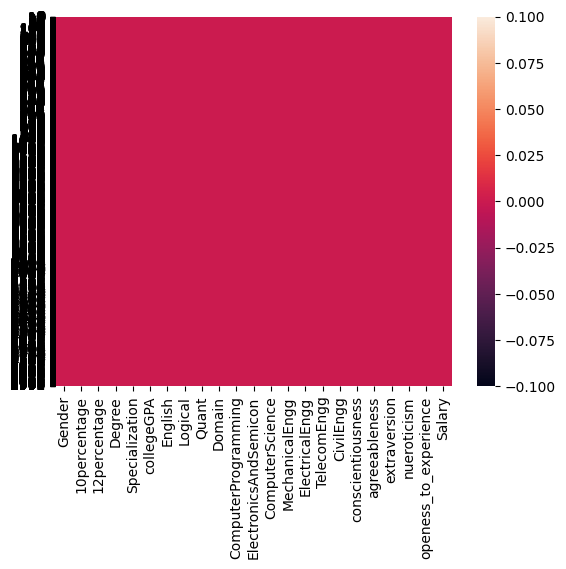

In [45]:
sns.heatmap(nb.isnull(), yticklabels=True)

# **Histogram**

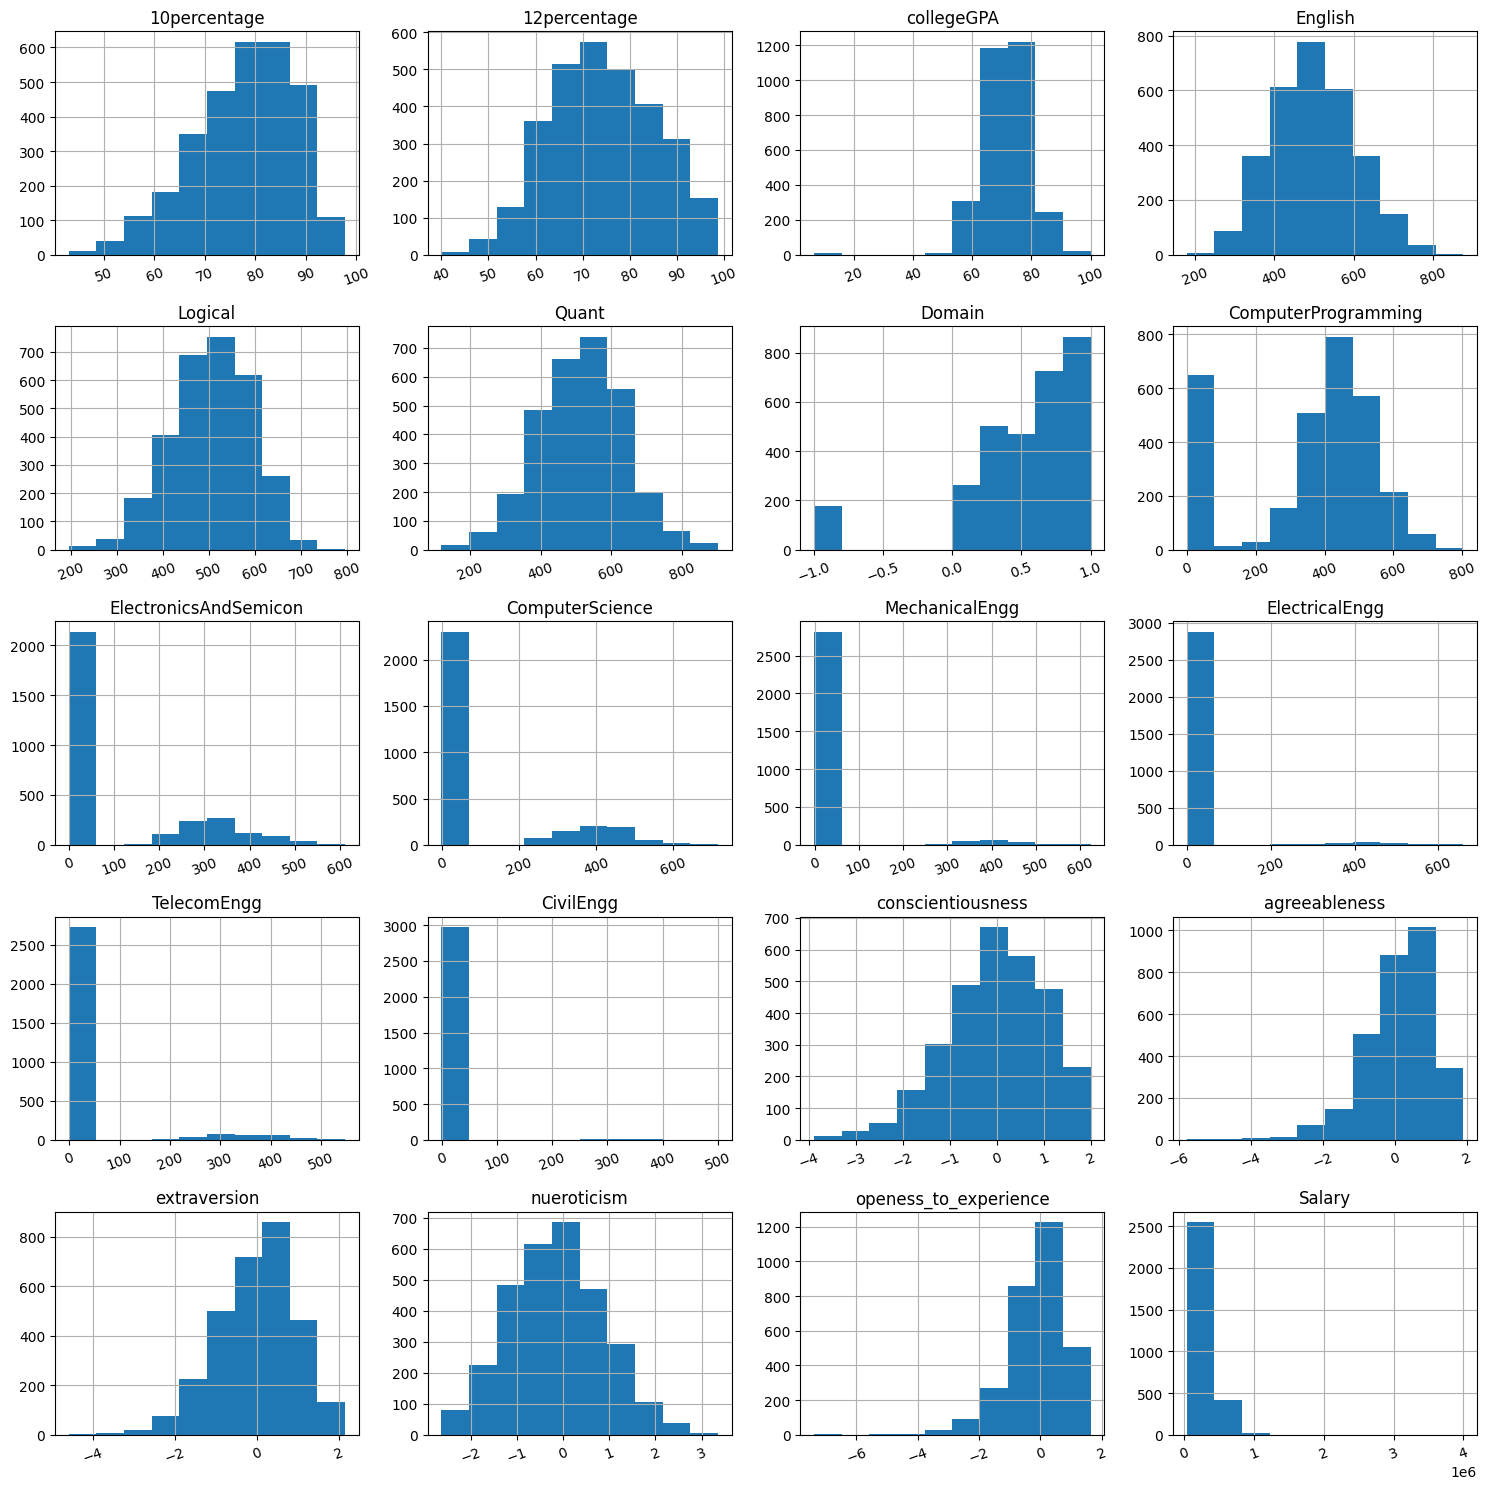

In [46]:
plt.rcParams['figure.figsize'] = [15,15]

nb.hist(xrot = 20)

# Adjust the subplots (so that they dont overlap)
plt.tight_layout()

# **Looking into Salary Distribution**

<ipython-input-47-9f97163d7037>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nb['Salary'])


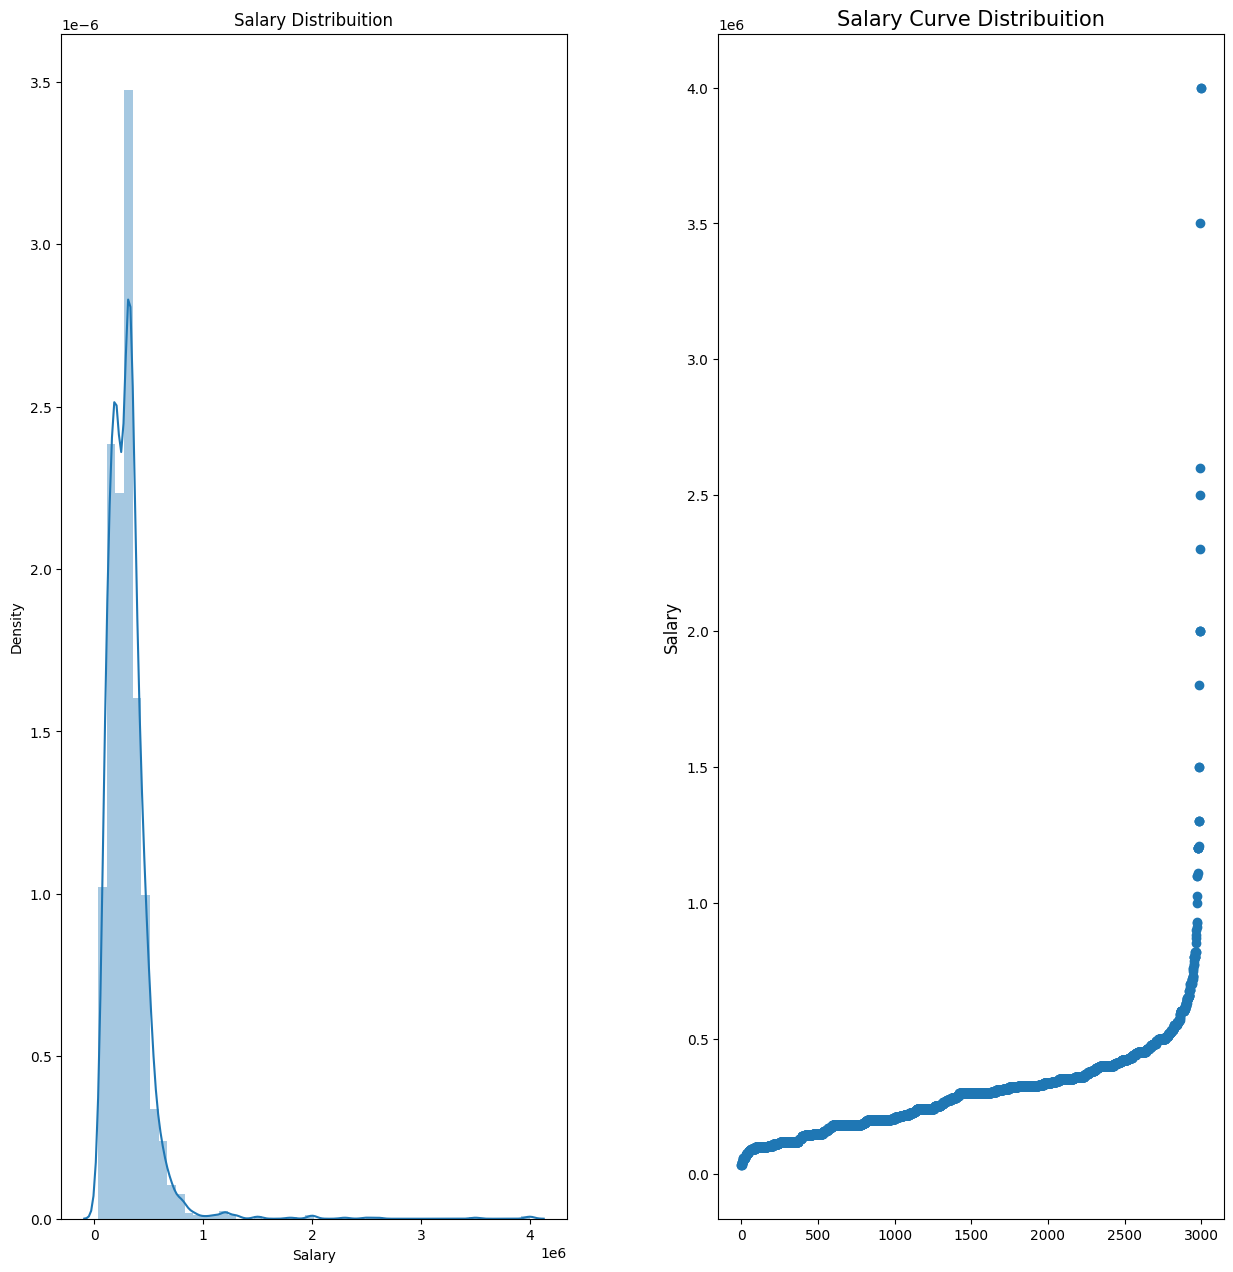

In [47]:
plt.subplot(121)
plt.title('Salary Distribuition')
sns.distplot(nb['Salary'])

plt.subplot(122)
g1 = plt.scatter(range(nb.shape[0]), np.sort(nb.Salary.values))
g1= plt.title("Salary Curve Distribuition", fontsize=15)
g1 = plt.xlabel("")
g1 = plt.ylabel("Salary", fontsize=12)
plt.subplots_adjust(wspace = 0.3, hspace = 0.5,top = 0.9)
plt.show()

Data Distribution: Categorical Variables

<ipython-input-52-1ead475a3a9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=nb, palette="rainbow")


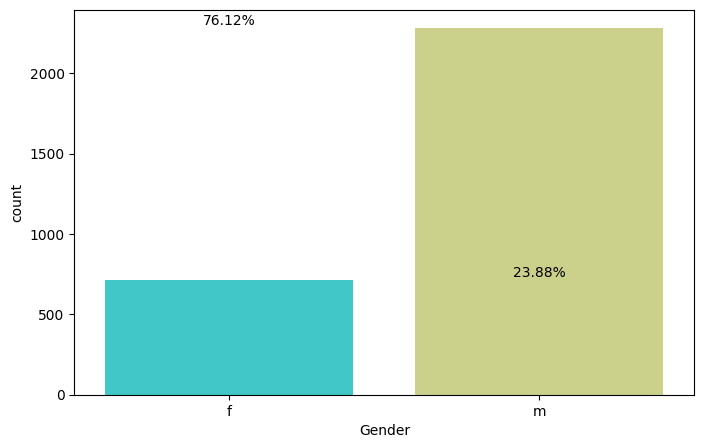

In [52]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", data=nb, palette="rainbow")

# Get counts for each gender
gender_counts = nb["Gender"].value_counts()

# Add percentage text above bars
for index, count in enumerate(gender_counts):
    percentage = round(count * 100 / len(nb), 2)
    plt.text(x=index, y=count + 20, s=f'{percentage}%', ha='center')

plt.show()

In [53]:
count=nb["Specialization"].value_counts()

 electronics & instrumentation engineering is repeating here with slight change in name so converting it into one category


In [54]:
nb['Specialization'] = nb['Specialization'].str.replace('electronics & instrumentation eng','electronics and instrumentation engineering')

In [55]:
def map_to_other_specialization(var):
    ''' if count of unique category is less than 10, replace the category as other '''
    if var in count[count<=10]:
        return 'other'
    else:
        return var

# apply the function to specialization to get the results
nb['Specialization'] = nb.Specialization.apply(map_to_other_specialization)

Count plot of unquie categories in specialization

<ipython-input-57-f53ce7d76a1c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Specialization', data=nb, palette='viridis')


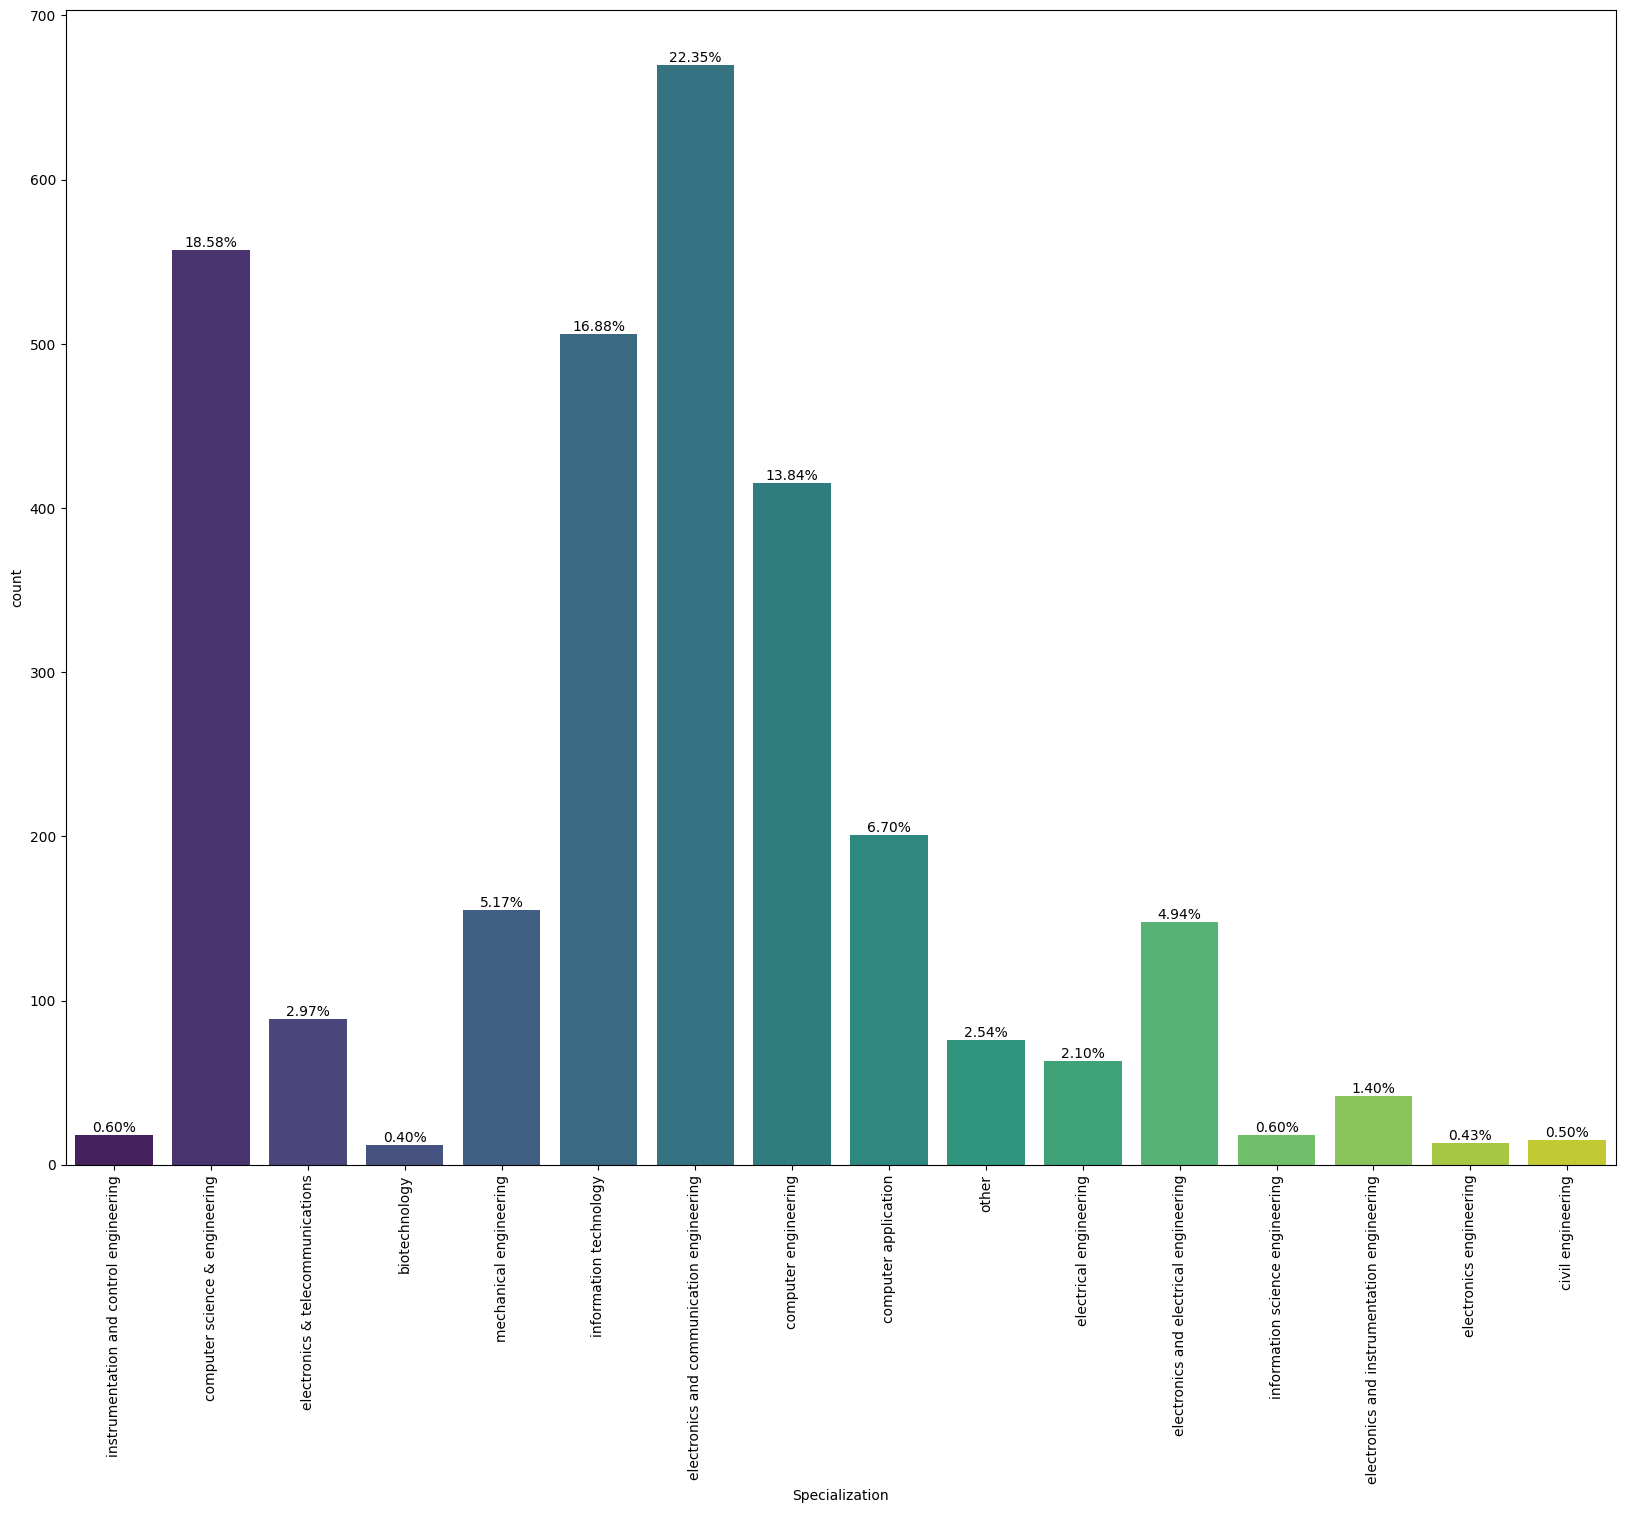

In [57]:
plt.figure(figsize=(20, 15))
total = float(len(nb))

ax = sns.countplot(x='Specialization', data=nb, palette='viridis')

# Adding percentage labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 2,
            '{:1.2f}%'.format((height / total) * 100),
            ha="center", fontsize=10)

plt.xticks(rotation=90)
plt.show()

Specialization
'''From the data above, we can see that the specialization that stands out the most is electronics and communication engineering followed by computer science & engineering

biotechnology and electronics engineering are the specialization that are not very popular both are the lowest value.'''

<ipython-input-58-e5455daf898a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = avg_sal_per_specialization.index,y = 'mean_salary',data = avg_sal_per_specialization,palette='rocket')


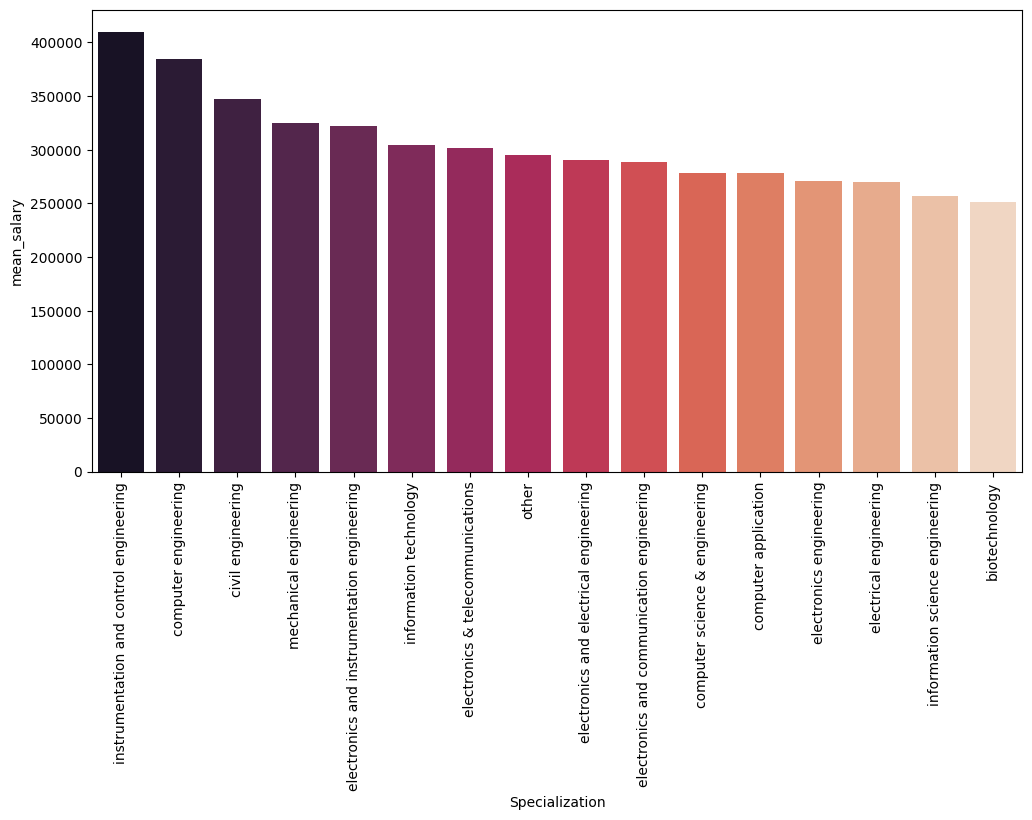

In [58]:
# average salary by specialization and sort them in decreasing order
avg_sal_per_specialization = nb.groupby('Specialization').agg(mean_salary =("Salary", 'mean')).sort_values(by = 'mean_salary',ascending=False)

# barplot of mean salary and specialization
plt.figure(figsize = (12, 6))
sns.barplot(x = avg_sal_per_specialization.index,y = 'mean_salary',data = avg_sal_per_specialization,palette='rocket')
plt.xticks(rotation = 90)
plt.show()

hand picking some continous variables for the pairplot() method as all variables wouldn't make much sense in pairplot()

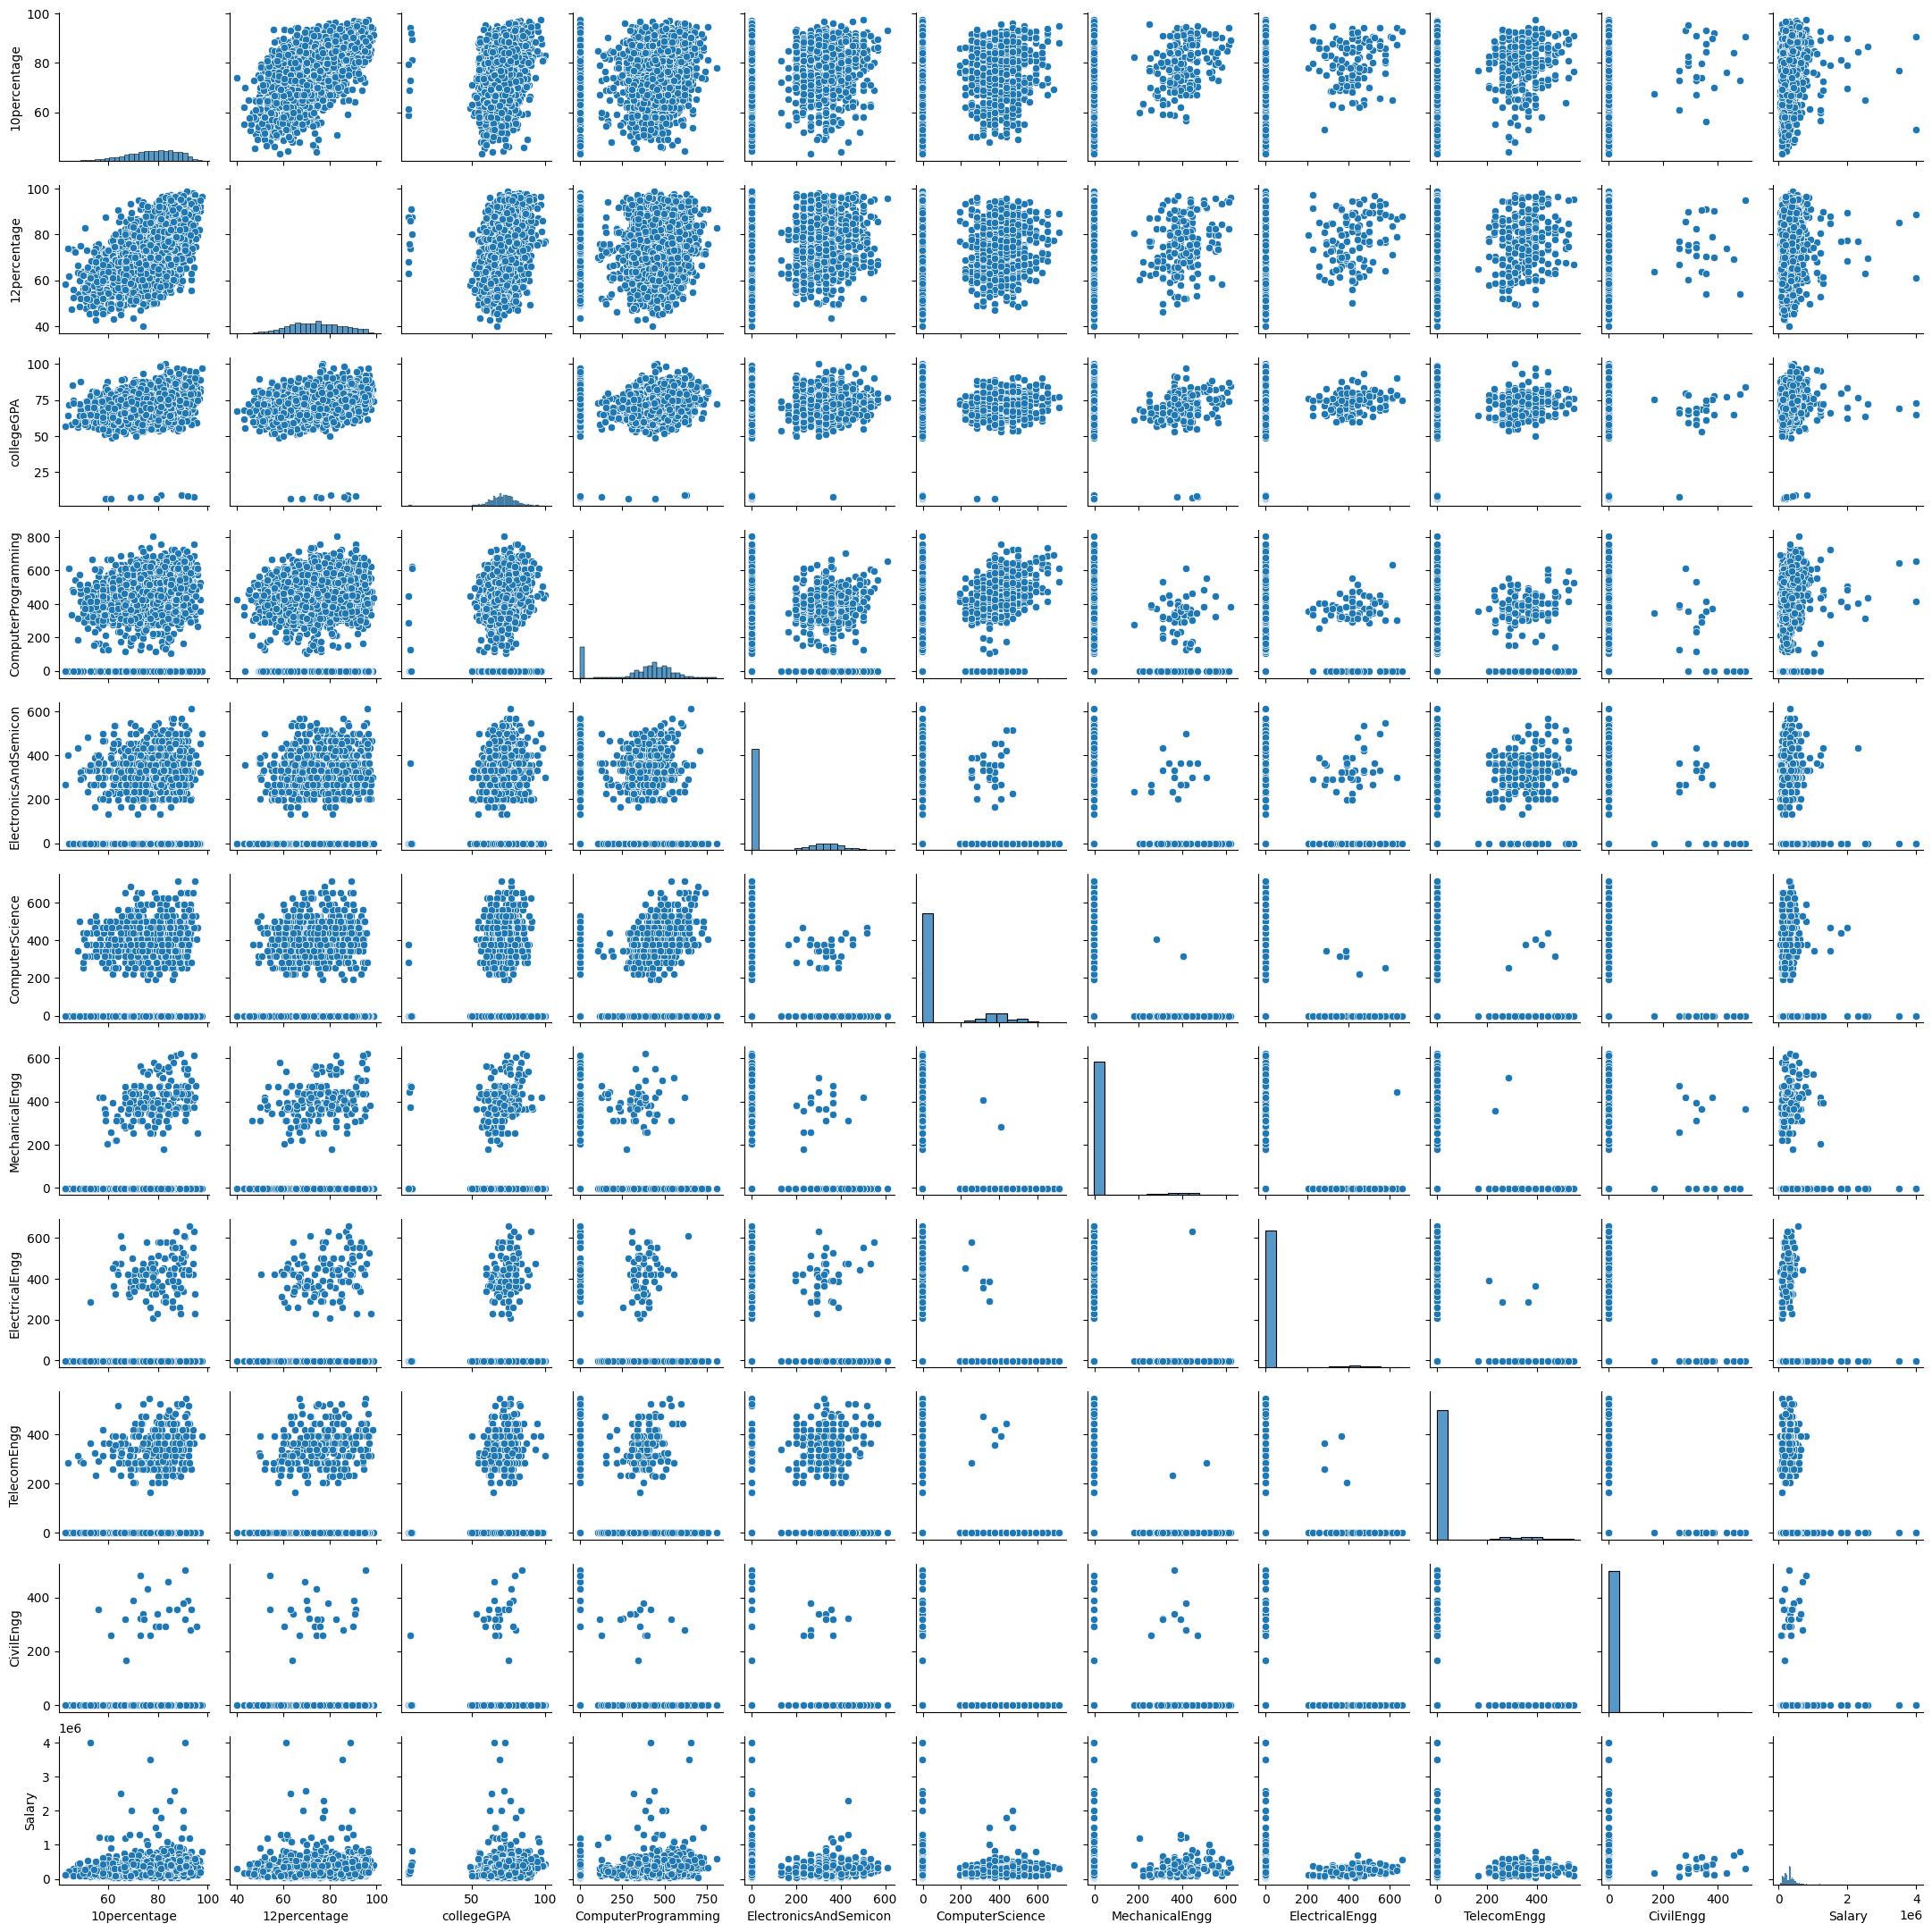

In [59]:
cont_vars=["10percentage","12percentage","collegeGPA",'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg','Salary']
sns.pairplot(nb[cont_vars],height=2)

Impact Analysis: Categorical Variables Using Boxplot

In [60]:
categoricalVars=['Gender','Degree','Specialization']

**Box Plot**

<ipython-input-62-08b45d2d3616>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
<ipython-input-62-08b45d2d3616>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
<ipython-input-62-08b45d2d3616>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


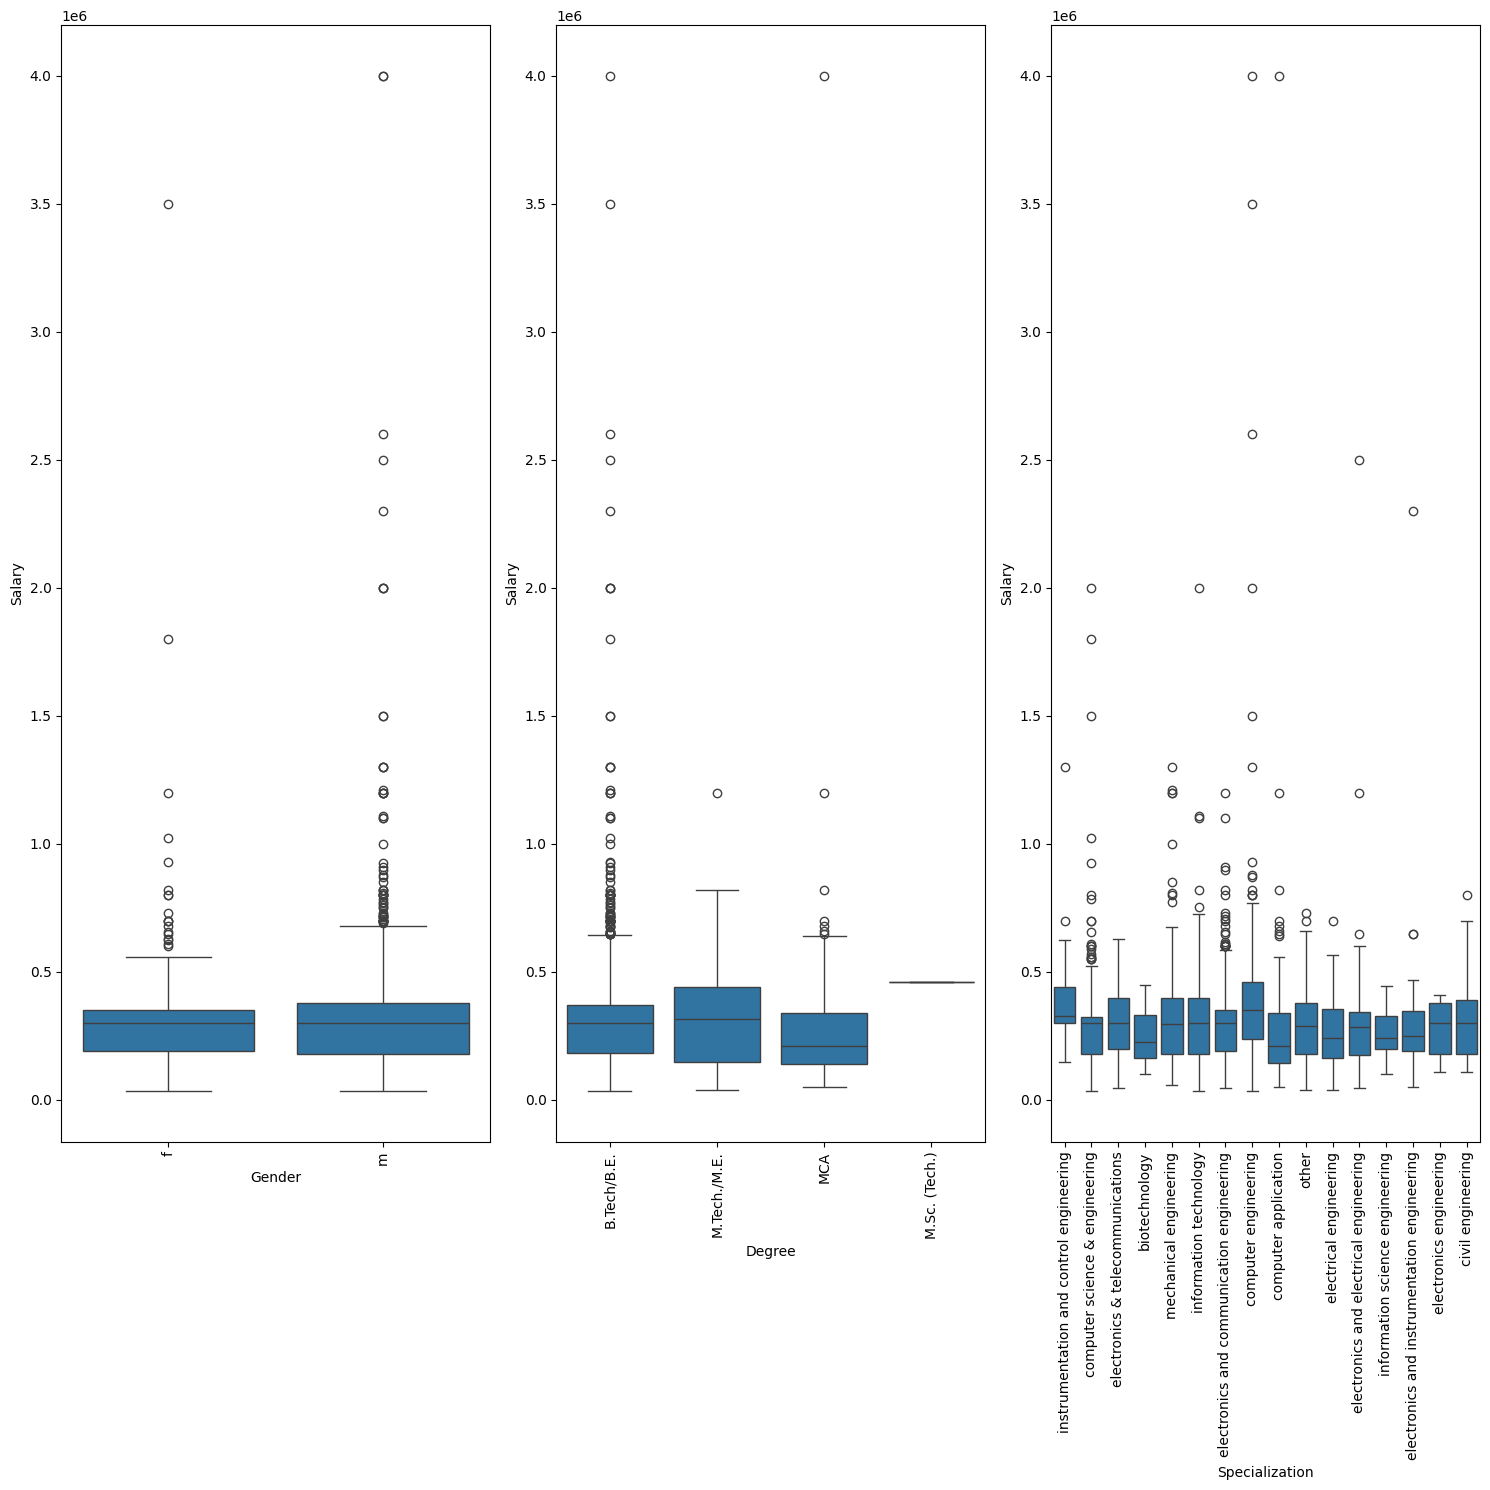

In [62]:
fig, ax = plt.subplots(1, 3, figsize=(15, 15))

for variable, subplot in zip(categoricalVars, ax.flatten()):
    plot = sns.boxplot(y='Salary', x=variable, data=nb, ax=subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

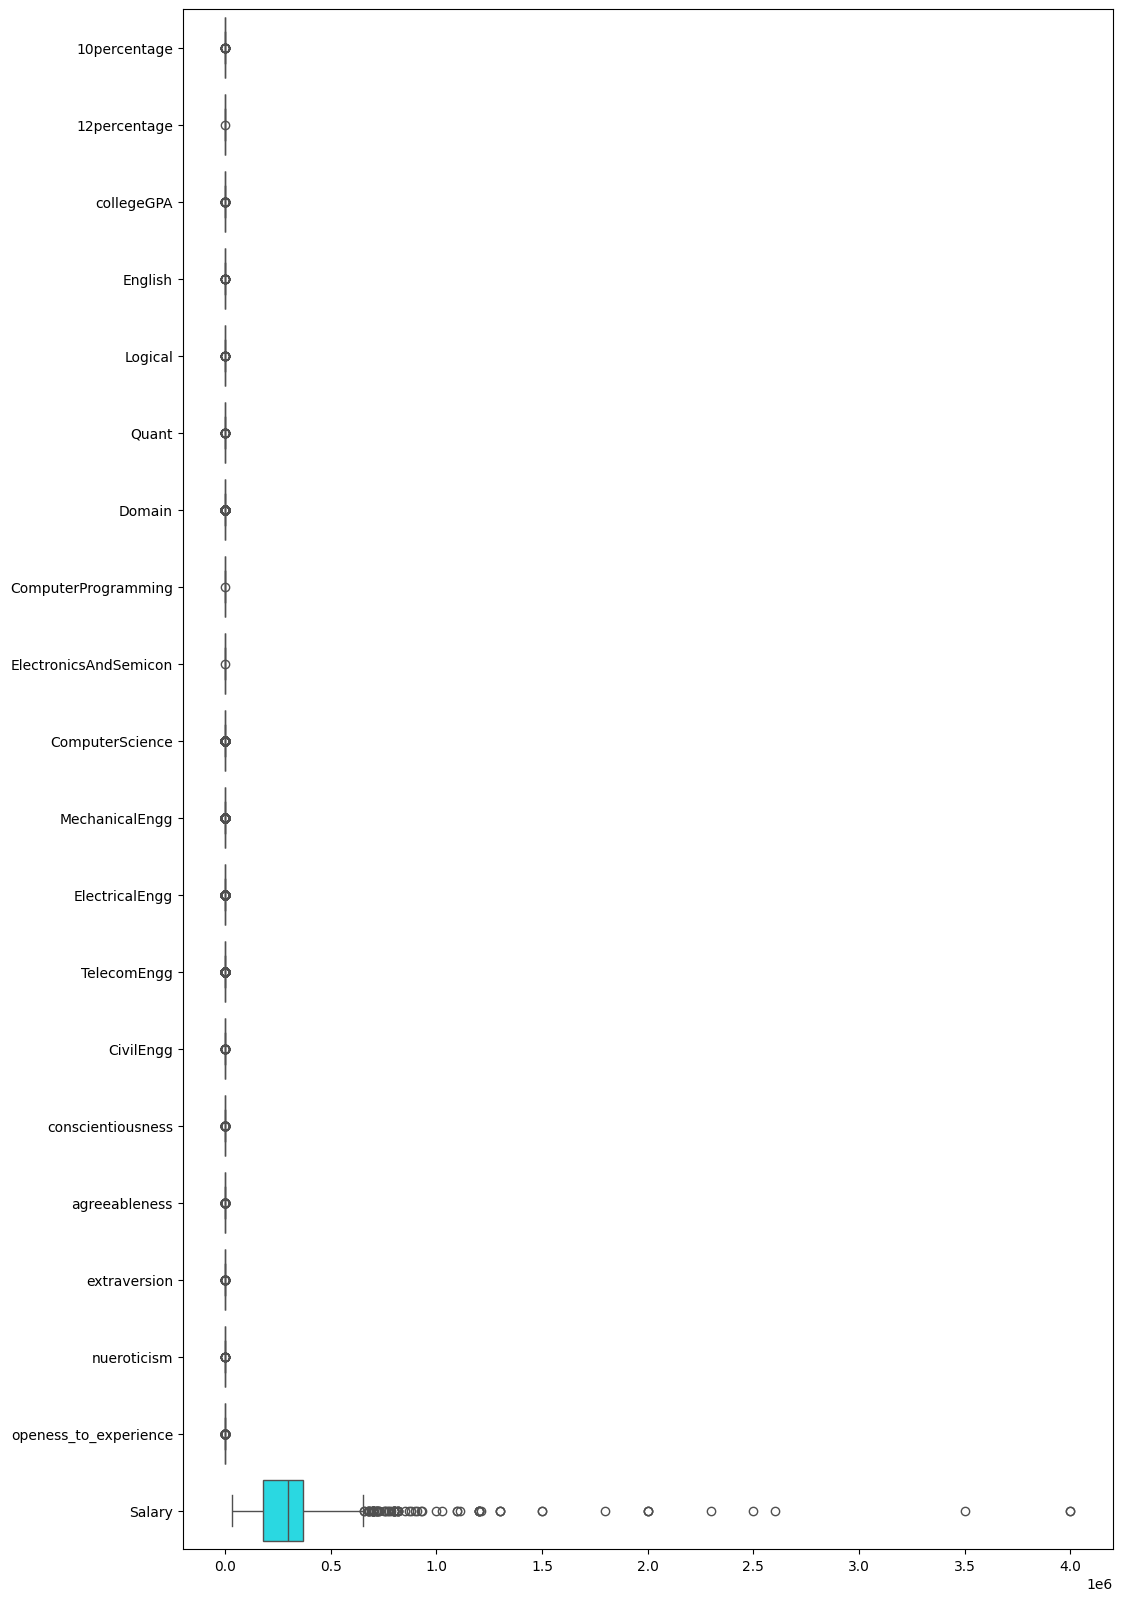

In [63]:
plt.rcParams['figure.figsize'] = (12,20)
sns.boxplot(data=nb, orient="h", palette="cool_r");

In [65]:
Q1 = nb.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = nb.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR0 = Q3 - Q1
print(IQR0)

10percentage                 14.460000
12percentage                 16.600000
collegeGPA                    9.770000
English                     145.000000
Logical                     123.750000
Quant                       165.000000
Domain                        0.493297
ComputerProgramming         200.000000
ElectronicsAndSemicon       234.000000
ComputerScience               0.000000
MechanicalEngg                0.000000
ElectricalEngg                0.000000
TelecomEngg                   0.000000
CivilEngg                     0.000000
conscientiousness             1.351800
agreeableness                 1.248100
extraversion                  1.276800
nueroticism                   1.394400
openess_to_experience         1.171600
Salary                   190000.000000
dtype: float64


In [66]:
IQR0.count()

20

<ipython-input-67-02114cea0cc1>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
<ipython-input-67-02114cea0cc1>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
<ipython-input-67-02114cea0cc1>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
<ipython-input-67-02114cea0cc1>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
<ipython-input-67-02114cea0cc1>:6: UserWarning: set_ticklabels() should only be used with a fixed number of 

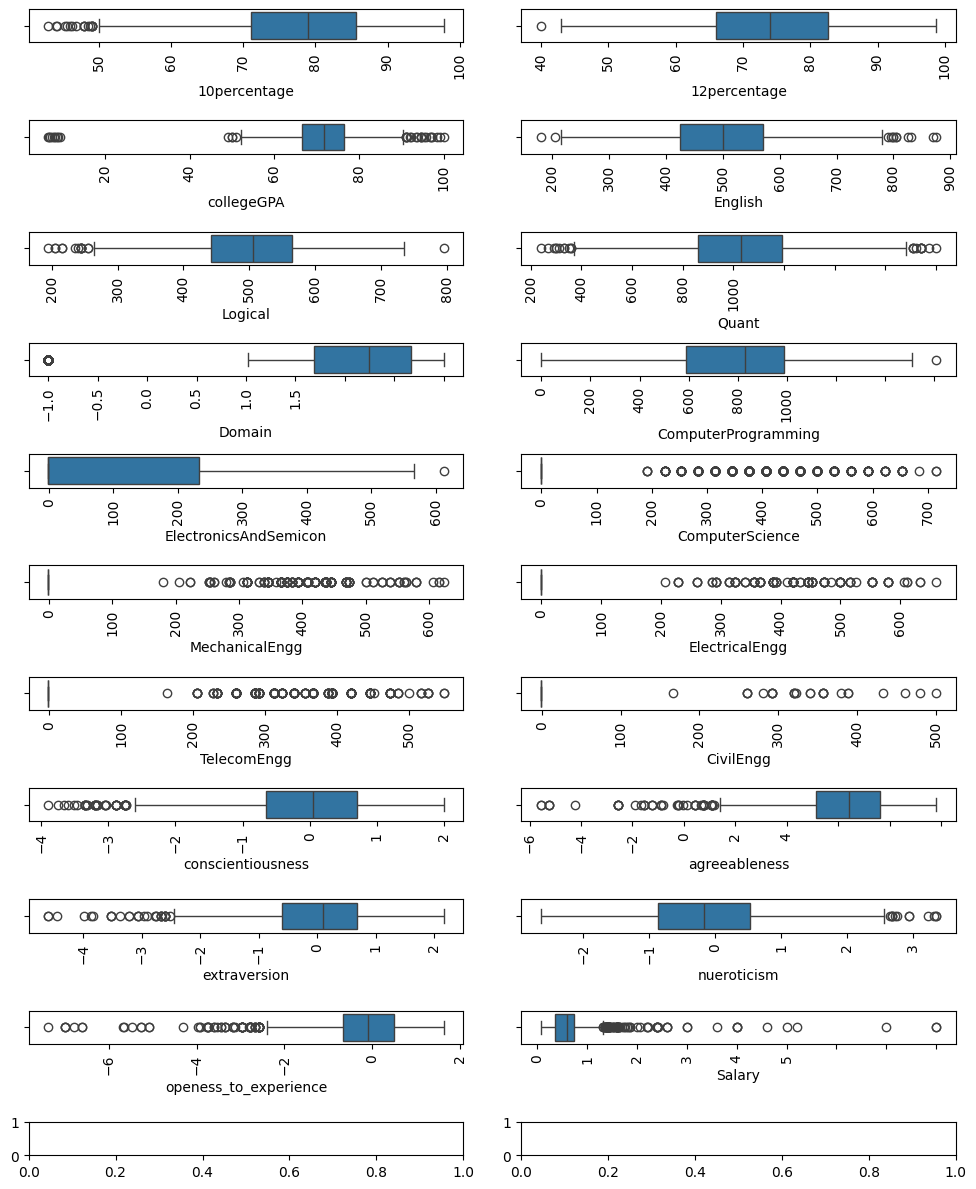

In [67]:
fig, ax = plt.subplots(11, 2, figsize = (10,12))

for variable, subplot in zip(IQR0.index, ax.flatten()): # ax.faltten() to get a flat array of 2*3 elements (6 plots in all)

    plot  = sns.boxplot(x = nb[variable],ax = subplot)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout();

'''Lets begin building our model
Lets start with LinearRegression, one of the most common model in predicting a numerical value

Split the dataset in Train and Test sets, uniformly at random.
Train Set with 80% of data and Test Set with 20% of data.'''

In [68]:
# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(nb, train_size = 0.7, test_size = 0.3, random_state = 100)

In [69]:
df_train.head()

Gender  10percentage  12percentage       Degree  \
150       m         80.00          89.0  B.Tech/B.E.   
91        m         72.00          60.0  B.Tech/B.E.   
2500      m         76.00          84.0  B.Tech/B.E.   
2751      f         84.80          81.2  B.Tech/B.E.   
2422      m         81.67          69.0  B.Tech/B.E.   

                                 Specialization  collegeGPA  English  Logical  \
150              computer science & engineering        62.0      325      530   
91               computer science & engineering        63.0      440      300   
2500                     information technology        64.0      544      535   
2751  electronics and communication engineering        73.8      425      565   
2422  electronics and communication engineering        89.2      455      655   

      Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
150     405  0.356536                  275                     -1   
91      285 -1.000000                   -1                     -1   
2500    485  0.413838                  385                     -1   
2751    565  0.376060                   -1                    300   
2422    595  0.538387                   -1                    333   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
150               346              -1              -1           -1         -1   
91                 -1              -1              -1           -1         -1   
2500               -1              -1              -1           -1         -1   
2751               -1              -1              -1           -1         -1   
2422               -1              -1              -1           -1         -1   

      conscientiousness  agreeableness  extraversion  nueroticism  \
150              0.9900         0.3789       -0.2974      -1.1218   
91               1.8517         0.8784        1.5470      -0.2344   
2500            -0.1082         0.9688       -0.7794       1.3549   
2751            -0.1082        -0.5523       -1.3599      -0.7603   
2422            -0.4173         0.6568        0.5269       0.8848   

      openess_to_experience  Salary  
150                 -1.2440  145000  
91                   0.4805  295000  
2500                 1.2923  525000  
2751                -0.4455  325000  
2422                -0.1295  415000

# **Dividing the training data set into X and Y**

In [70]:
y_train = df_train.pop('Salary')
X_train = df_train
X_train.head()

Gender  10percentage  12percentage       Degree  \
150       m         80.00          89.0  B.Tech/B.E.   
91        m         72.00          60.0  B.Tech/B.E.   
2500      m         76.00          84.0  B.Tech/B.E.   
2751      f         84.80          81.2  B.Tech/B.E.   
2422      m         81.67          69.0  B.Tech/B.E.   

                                 Specialization  collegeGPA  English  Logical  \
150              computer science & engineering        62.0      325      530   
91               computer science & engineering        63.0      440      300   
2500                     information technology        64.0      544      535   
2751  electronics and communication engineering        73.8      425      565   
2422  electronics and communication engineering        89.2      455      655   

      Quant    Domain  ComputerProgramming  ElectronicsAndSemicon  \
150     405  0.356536                  275                     -1   
91      285 -1.000000                   -1                     -1   
2500    485  0.413838                  385                     -1   
2751    565  0.376060                   -1                    300   
2422    595  0.538387                   -1                    333   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
150               346              -1              -1           -1         -1   
91                 -1              -1              -1           -1         -1   
2500               -1              -1              -1           -1         -1   
2751               -1              -1              -1           -1         -1   
2422               -1              -1              -1           -1         -1   

      conscientiousness  agreeableness  extraversion  nueroticism  \
150              0.9900         0.3789       -0.2974      -1.1218   
91               1.8517         0.8784        1.5470      -0.2344   
2500            -0.1082         0.9688       -0.7794       1.3549   
2751            -0.1082        -0.5523       -1.3599      -0.7603   
2422            -0.4173         0.6568        0.5269       0.8848   

      openess_to_experience  
150                 -1.2440  
91                   0.4805  
2500                 1.2923  
2751                -0.4455  
2422                -0.1295

# **Build a linear model**

In [71]:
# Independent Features both continuous and categorical variables
Indpt_Var = nb.drop("Salary",axis = 1)
# Dependent/Target Feature
Dept_Var = nb["Salary"]
# Filtering out only the Continuous Variables
Cont_Var=[col for col in Indpt_Var.columns if Indpt_Var[col].dtypes!=object]
categoricalVars # Filter done during plotting

['Gender', 'Degree', 'Specialization']

In [72]:
dummy_var = pd.get_dummies(Indpt_Var[categoricalVars],drop_first = True)
#Feature Scaling Continuous Variables by Standardization
sc = StandardScaler()
scaling = pd.DataFrame(sc.fit_transform(Indpt_Var[Cont_Var]), columns = Cont_Var)
scaling.head()

10percentage  12percentage  collegeGPA   English   Logical     Quant  \
0      1.013260      0.868731    0.284462  1.414550  1.885408  2.421635   
1     -2.066396     -0.885111   -0.801597 -0.580000 -0.749629 -2.489370   
2     -0.033623      0.973962   -1.178393 -0.152596 -0.291362 -0.074793   
3      0.663300      1.048612    1.094696  1.651996  1.369857  0.989259   
4      0.433325      0.059265   -0.887792  0.702211 -0.062228 -1.220694   

     Domain  ComputerProgramming  ElectronicsAndSemicon  ComputerScience  \
0  0.401518             0.651034               1.699765        -0.535271   
1 -0.358610             0.064215              -0.612610        -0.535271   
2  0.682520            -1.725585               1.913990        -0.535271   
3  1.039403             1.482362              -0.612610        -0.535271   
4 -0.496443            -0.180293              -0.612610        -0.535271   

   MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  conscientiousness  \
0       -0.251971       -0.200695    -0.309733  -0.091418          -0.117375   
1       -0.251971       -0.200695    -0.309733  -0.091418           1.143941   
2       -0.251971       -0.200695     2.211137  -0.091418           0.535434   
3       -0.251971       -0.200695    -0.309733  -0.091418          -0.397721   
4       -0.251971       -0.200695    -0.309733  -0.091418          -1.425138   

   agreeableness  extraversion  nueroticism  openess_to_experience  
0       0.264404      1.296849     0.288196               0.427036  
1      -0.084042      1.296849     0.663714              -0.143787  
2      -0.260986      1.611850    -0.142422              -0.145376  
3       0.090181      0.338753     0.413401               0.617311  
4      -0.914035     -1.102338     0.205578               0.325245

In [73]:
final = pd.concat([dummy_var,scaling],axis = 1)

In [74]:
X = final.copy() # Independent Features
Y = Dept_Var # Dependent/Target Features

In [75]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.80,random_state = 101)

 In statsmodels library, linear regression function does NOT account for an intercept by default.
 So, we need to explicitly add intercept (in the df) - a column called "const" with all values being 1 in it.

In [76]:
X_train = add_constant(X_train)
X_test = add_constant(X_test)

In [77]:
trainXCopy1 = X_train.copy()

In [78]:
X_test

const  Gender_m  Degree_M.Sc. (Tech.)  Degree_M.Tech./M.E.  Degree_MCA  \
2394    1.0     False                 False                False       False   
1624    1.0      True                 False                False       False   
1459    1.0      True                 False                False       False   
1767    1.0      True                 False                False       False   
457     1.0     False                 False                False       False   
...     ...       ...                   ...                  ...         ...   
184     1.0      True                 False                False       False   
1846    1.0      True                 False                False       False   
969     1.0     False                 False                False       False   
1196    1.0      True                 False                False       False   
579     1.0      True                 False                False       False   

      Specialization_civil engineering  Specialization_computer application  \
2394                             False                                False   
1624                             False                                False   
1459                             False                                False   
1767                             False                                False   
457                              False                                False   
...                                ...                                  ...   
184                              False                                False   
1846                             False                                False   
969                              False                                False   
1196                             False                                False   
579                              False                                False   

      Specialization_computer engineering  \
2394                                False   
1624                                False   
1459                                False   
1767                                False   
457                                 False   
...                                   ...   
184                                 False   
1846                                False   
969                                 False   
1196                                False   
579                                 False   

      Specialization_computer science & engineering  \
2394                                          False   
1624                                          False   
1459                                          False   
1767                                          False   
457                                           False   
...                                             ...   
184                                            True   
1846                                           True   
969                                           False   
1196                                          False   
579                                           False   

      Specialization_electrical engineering  \
2394                                  False   
1624                                  False   
1459                                  False   
1767                                  False   
457                                   False   
...                                     ...   
184                                   False   
1846                                  False   
969                                   False   
1196                                  False   
579                                   False   

      Specialization_electronics & telecommunications  \
2394                                            False   
1624                                            False   
1459                                            False   
1767                                            False   
457                                         

# **Tuning Learning rate**

In [79]:
sgdModel2 = SGDRegressor(fit_intercept = False, random_state = 7, eta0 = 0.0001) # Default eta0: 0.01
sgdModel2.fit(X_train, Y_train)
# Model Prediction
testPred = sgdModel2.predict(X_test)
pd.DataFrame({"Actual": Y_test[:6], "Prediction": testPred[0:6]})

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Actual     Prediction
2394  180000  266627.213692
1624  160000  173595.579553
1459  660000  286500.269913
1767  180000  187462.988961
457   145000  179756.500815
508   310000  446302.435600

# **Model Evalution**

In [80]:
print("RMSE",np.sqrt(np.mean((Y_test - testPred)**2)))
print("MAPE",(np.mean(np.abs(((Y_test-testPred)/Y_test))))*100)

RMSE 171087.8823016396
MAPE 44.46141421104036


Even after tuning the learning rate there is not much difference in the RMSE and MAPE

# **Decision Tree**

In [81]:
X_train.shape
(2398, 18)
from sklearn.tree import DecisionTreeRegressor
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 101)
# fit the regressor with X and Y data
regressor.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=101)

In [82]:
testPredDf = pd.DataFrame()
testPredDf['Prediction'] = regressor.predict(X_test) #Outputs the dept/predicted values of the Test set
# Create a column to store actuals
testPredDf["Actual"] = Y_test.values #Dependent variable of the Actual data
# Validate if the above worked
testPredDf.head()

Prediction  Actual
0    210000.0  180000
1    105000.0  160000
2    240000.0  660000
3    250000.0  180000
4    420000.0  145000

# **Model Evalution**

In [83]:
print("RMSE:",np.sqrt(np.mean((Y_test - testPred)**2)))
print("MAPE:",(np.mean(np.abs(((Y_test - testPred)/Y_test))))*100)
#Still no difference RMSE and MAPE is similar to the SGD & CFS models above

RMSE: 171087.8823016396
MAPE: 44.46141421104036


# **Random Forest**

In [84]:
M1 = RandomForestRegressor(random_state=123)
M1 = M1.fit(X_train, Y_train) # Indep, Dep
# Model Prediction on Testset
testPredDf = pd.DataFrame()

testPredDf["Prediction"] = M1.predict(X_test)

# Create a column to store actuals
testPredDf["Actual"] = Y_test.values

# Validate if the above worked
testPredDf.head()

Prediction  Actual
0    274100.0  180000
1    241400.0  160000
2    391750.0  660000
3    220650.0  180000
4    481050.0  145000

Model Evalution

In [85]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf["Prediction"])**2)))

print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

RMSE: 189465.6470731128
MAPE: 50.35476544066048


RMSE & MAPE reduced a lot with huge margin compared to other models above

Also MAPE is 3% which is below 10% making it a good model for prediction

In [86]:
M3 = RandomForestRegressor(n_estimators = 200, max_features = 15, min_samples_leaf = 2, random_state = 123)
M3 = M3.fit(X_train, Y_train) # Indep, Dep

In [87]:
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = M3.predict(X_test)
testPredDf["Actual"] = Y_test.values

print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf["Prediction"])**2)))
print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

RMSE: 173761.0818140212
MAPE: 47.32207040801511


RMSE & MAPE has reduced even further when model built via the hyperparameters given by GridsearchCV


# **XGBoost**

In [88]:
!pip install xgboost

In [89]:
from xgboost.sklearn import XGBRegressor
XG_raw = XGBRegressor(random_state =100).fit(X_train,Y_train)
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = XG_raw.predict(X_test)
testPredDf["Actual"] = Y_test.values
testPredDf.head()

Prediction  Actual
0  203693.421875  180000
1  270488.593750  160000
2  387830.812500  660000
3  253025.437500  180000
4  260363.000000  145000

In [91]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf['Prediction'])**2)))
print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

RMSE: 191948.35215819
MAPE: 51.597299522551545


# **Gradient Boosting**

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
GD_raw = GradientBoostingRegressor(random_state =100).fit(X_train,Y_train)
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = GD_raw.predict(X_test)
testPredDf["Actual"] = Y_test.values
testPredDf.head()

Prediction  Actual
0  251912.238171  180000
1  241729.921793  160000
2  309629.461591  660000
3  219323.857335  180000
4  252176.646908  145000

In [93]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf['Prediction'])**2)))

print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

RMSE: 196231.58622712837
MAPE: 50.656684970379374


# **AdaBoost**

In [94]:
from sklearn.ensemble import AdaBoostRegressor
Ada_raw = AdaBoostRegressor(random_state =100).fit(X_train,Y_train)
testPredDf = pd.DataFrame()
testPredDf["Prediction"] = Ada_raw.predict(X_test)
testPredDf["Actual"] = Y_test.values
testPredDf.head()

Prediction  Actual
0  478606.687898  180000
1  466144.814090  160000
2  499333.333333  660000
3  504012.208657  180000
4  322500.000000  145000

In [95]:
print("RMSE:",np.sqrt(np.mean((testPredDf["Actual"] - testPredDf['Prediction'])**2)))
print("MAPE:",(np.mean(np.abs(((testPredDf["Actual"] - testPredDf["Prediction"])/testPredDf["Actual"]))))*100)

RMSE: 312428.30556875025
MAPE: 132.29311444192257
